# Анализ оттока клиентов банка «Метанпром»

**Описание проекта**

В последнее время в банке «Метанпром» значительно повысился отток клиентов. Это становится серьёзной проблемой, которая угрожает существованию банка. Необходимо максимально эффективно выделить сегменты склонных к уходу из банка клиентов, чтобы они были однородными, высокоотточными и охватывали максимальное количество проблемных зон банка. Последующее маркетинговое воздействие на эти сегменты должно привести к уменьшению оттока клиентов.

Проект включает в себя анализ клиентов регионального банка, проверку гипотез, выделение сегментов клиентов, склонных уходить из банка, и предоставление рекомендаций для отдела маркетинга.

**Цель исследования** — анализ оттока клиентов банка «Метанпром». Анализ покажет, какие клиенты уходят из банка, а также поможет составить сегменты клиентов, которые склонны уходить из банка.

**Описание данных**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

- `USERID` — идентификатор пользователя;

- `score` — баллы кредитного скоринга;

- `city` — город;

- `gender` — пол;

- `age` — возраст;

- `equity` — количество баллов собственности;

- `balance` — баланс на счёте;

- `products` — количество продуктов, которыми пользуется клиент;

- `credit_card` — есть ли кредитная карта;

- `last_activity` — активный клиент;

- `EST_SALARY` — оценочный доход клиента;

- `сhurn` — признак оттока.

**План работы**

1. Загрузка и предобработка данных.
- Загрузка данных о клиентах банка из csv-файла в переменную.
- Вывод первых строк набора данных.
- Изучение общей информации о датафрейме.
- Анализ пропущенных значений, явных и неявных дубликатов в данных.
- Замена названий столбцов датафрейма.
- Преобразование данных в нужный тип.
- Анализ выбросов в данных.

2. Исследовательский анализ данных.
- Изучение распределений по всем признакам с разбивкой по признаку оттока.
- Выделение значений и интервалов отточности.
- Составление и сравнение портретов типичных клиентов, которые склонны и не склонны уходить из банка.
- Корреляционный анализ. Определение, существует ли зависимость между признаком оттока и другими переменными и насколько она сильна.
- Определение всех значимых признаков отточности.

3. Проверка статистических гипотез.
- Обоснование выбора статистического метода проверки гипотез.
- Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.
- Проверка гипотезы различия возраста между теми клиентами, которые ушли и теми, которые остались.
- Проверка гипотезы различия в наличии кредитной карты между теми клиентами, которые ушли и теми, которые остались.
- Проверка гипотезы различия пола между теми клиентами, которые ушли и теми, которые остались.
- Проверка гипотезы различия количества баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.
- Проверка гипотезы различия количества используемых банковских продуктов между теми клиентами, которые ушли и теми, которые остались.
- Проверка гипотезы различия в проявлении активности между теми клиентами, которые ушли и теми, которые остались.
- Проверка гипотезы различия количества баллов собственности между теми клиентами, которые ушли и теми, которые остались.
- Подведение промежуточных итогов о том, какие показатели стратегически влияют на отток клиентов банка, какие значения и интервалы этих признаков связаны с оттоком.

4. Формирование сегментов клиентов, которые склонны уходить из банка.
- Использование признаков, влияющих на отток клиентов, полученных в ходе исследовательского анализа данных и проверки гипотез, для выделения 3-х или более сегментов (размер сегмента — от 500 до 2 тыс. человек).
- Приоритизация выделенных сегментов.
- Рассчёт для каждого сегмента 3-х показателей: количество пользователей в сегменте, количество ушедших из банка клиентов и процент оттока.
- Описание полученных сегментов.
- Написание конкретных рекомендаций по снижению оттока для отдела маркетинга по сегментам.

5. Подготовка презентации по итогам исследования.
- Отбор важных тезисов и наблюдений, которые могут заинтересовать заказчика.
- Презентация полученных результатов, которые в будущем помогут в сокращении оттока клиентов.

6. Написание общего вывода по результатам исследования.

## Загрузка данных и подготовка их к анализу

### Считывание файла с данными и сохранение в датафрейм

Импортируем необходимые библиотеки и модули.

In [8]:
import pandas as pd 
# импорт библиотеки pandas
from matplotlib import pyplot as plt 
%matplotlib inline
# импорт модуля pyplot из библиотеки matplotlib
import seaborn as sns
# импорт библиотеки seaborn
import phik
# импорт модуля phik
from phik.report import plot_correlation_matrix
# импорт функции plot_correlation_matrix из phik.report
import scipy.stats as st
# импорт модуля stats из библиотеки scipy

Считаем данные из файла в датафрейм и сохраним в переменную `data`.

In [10]:
try:
    data = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
# чтение данных из csv-файла в датафрейм и сохранение в переменную ‘data’

### Вывод первых строк набора данных

Выведем первые 5 строк датафрейма `data` на экран.

In [13]:
data.head()
# отображение первых 5 строк датафрейма ‘data’

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Изучение общей информации о датафрейме. Анализ пропусков и дубликатов

Выведем основную и статистическую информацию о датафрейме `data`, число дубликатов, а также количество и долю пропущенных значений для всех столбцов.

In [16]:
def df_info(df, name):
# функция для вывода информации о датафрейме
    print('\033[1m', f'Таблица «{name}»', '\033[0m')
    # вывод названия датафрейма
    print(df.info())
    # вывод информации о структуре данных, хранящихся в переменной ‘df’
    print('-' * 80)
    # вывод символа «-» 80 раз
    display(df.describe())
    # вывод статистической информации о значениях столбцов датафрейма ‘df’
    print('-' * 80)
    # вывод символа «-» 80 раз
    print('\033[1m', f'Количество дубликатов в таблице «{name}»:', 
          df.duplicated().sum(), 
          ', процент дубликатов:', 
          round((df.duplicated().sum() / len(df)) * 100, 2), '%',
          '\033[0m')
    # вычисление количества и доли дубликатов в датафрейме ‘df’
    print('-' * 80)
    # вывод символа «-» 80 раз
    for i in df.columns:
        print('\033[1m', f'Столбец «{i}» -', 
        'количество NaN:', df[i].isna().sum(),
        ', процент NaN:', round(df[i].isna().mean() * 100, 2), 
        '%', '\033[0m')
        # вычисление количества и доли отсутствующих значений (NaN) 
        # в каждом столбце датафрейма ‘df’
        print('-' * 80)
        # вывод символа «-» 80 раз
    
df_info(data, 'data')
# вызов функции df_info для датафрейма ‘data’

 Таблица «data» 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None
--------------------------------------------------------------------------------


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


--------------------------------------------------------------------------------
 Количество дубликатов в таблице «data»: 0 , процент дубликатов: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «USERID» - количество NaN: 0 , процент NaN: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «score» - количество NaN: 0 , процент NaN: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «city» - количество NaN: 0 , процент NaN: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «gender» - количество NaN: 0 , процент NaN: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «age» - количество NaN: 26 , процент NaN: 0.26 % 
--------------------------------------------------------------------------------
 Столбец «equity» - количество NaN: 0 , процент NaN: 0.0 % 
-----

Датасет хранит информацию о 10 тыс. клиентов банка. В таблице `data` 10 тыс. строк и 12 столбцов. Названия некоторых столбцов необходимо привести к «змеиному» регистру. Шесть столбцов содержат целые числа (`'USERID'`, `'equity'`, `'products'`, `'credit_card'`, `'last_activity'`, `'churn'`), четыре столбца — вещественные числа (`'score'`, `'age'`, `'balance'`, `'EST_SALARY'`) и два столбца — данные с типом object (`'city'`, `'gender'`). Явные дубликаты в датафрейме `data` отсутствуют. Существует 2 тыс. 295 пропусков в столбце `'balance'`, что составляет 22.95% от общего количества наблюдений, а также 26 пропусков в столбце `'age'` — 0.26%.

Выясним, существует ли зависимость между пропущенными значениями в данных и другими переменными.

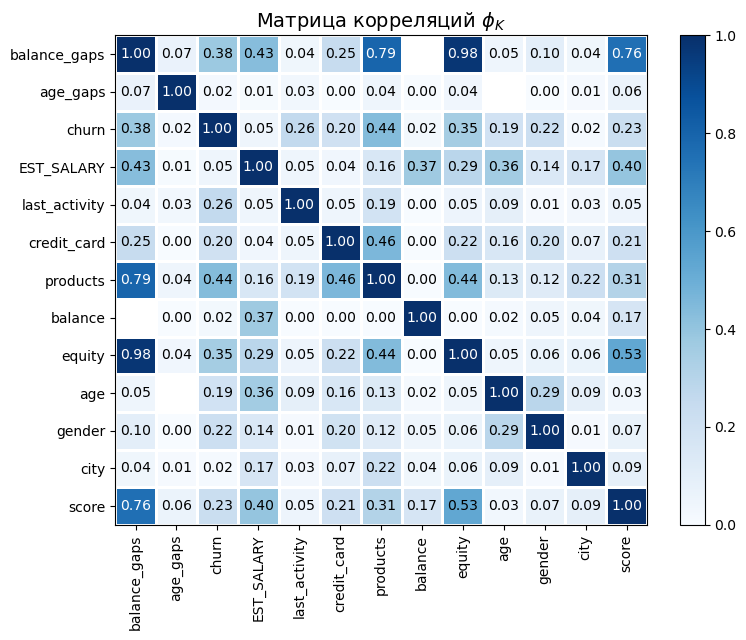

In [19]:
data_copy = data.copy()
# создание копии датафрейма ‘data’ 
# и сохранение её в переменной ‘data_copy’
data_copy['age_gaps'] = data_copy['age'].isnull()
# создание нового столбца с именем ‘age_gaps’, 
# который содержит логические значения, 
# указывающие на наличие или отсутствие пропущенных значений 
# в столбце ‘age’ датафрейма ‘data_copy’
data_copy['balance_gaps'] = data_copy['balance'].isnull()
# создание нового столбца с именем ‘balance_gaps’, 
# который содержит логические значения, 
# указывающие на наличие или отсутствие пропущенных значений 
# в столбце ‘balance’ датафрейма ‘data_copy’
phik_matrix = data_copy.drop('USERID', axis=1).phik_matrix(
    interval_cols=['score', 'age', 'balance', 'EST_SALARY'])
# рассчёт корреляционной матрицы
# вычисление коэффициента корреляции phik 
# между всеми парами столбцов датафрейма ‘data_copy’, кроме столбца ‘user_id’
# указание столбцов ‘score’, ‘age’, 
# ‘balance’, ‘EST_SALARY’ в качестве непрерывных признаков
plot_correlation_matrix(phik_matrix.values, 
x_labels=phik_matrix.columns, y_labels=phik_matrix.index, 
                        vmin=0, vmax=1, color_map='Blues', 
                        title=r'Матрица корреляций $\phi_K$', 
                        fontsize_factor=1, figsize=(8, 6.5))
# создание тепловой карты на основе корреляционной матрицы
# phik_matrix.values: значения корреляционной матрицы
# x_labels, y_labels: метки строк и столбцов корреляционной матрицы
# vmin, vmax: диапазон значений для цветовой шкалы
# color_map: цветовая карта для отображения значений
# title: заголовок графика
# fontsize_factor: коэффициент масштабирования размера шрифта
# figsize: размер графика
plt.tight_layout()
# автоматическая настройка расположения элементов графика
plt.show()
# отображение графика

Пропущенные значения в столбце с возрастами клиентов банка очень слабо коррелируют с другими столбцами — корреляция близка к 0. Пропуски могут быть связаны с отсутствием информации о возрасте у некоторых клиентов банка. Заполнять пропущенные значения средними или медианными значениями будет неправильно. Пропусков в столбце `'age'` датафрейма `data` очень мало, удалим их.

In [21]:
len_original_df = len(data)
# запись в переменную ‘len_original_df’ 
# значения длины исходного датафрейма ‘data’
print('Суммарный баланс на счетах всех клиентов банка:', 
data['balance'].sum())
# суммирование значений столбца ‘balance’ датафрейма ‘data’
print('Суммарный баланс на счетах клиентов, у которых не указан возраст:', 
data_copy.query('age_gaps == True')['balance'].sum())
# суммирование значений столбца ‘balance’ датафрейма ‘data_copy’ с условием, 
# что значения столбца ‘age_gaps’ соответствуют True
print('Доля суммарного баланса на счетах клиентов, у которых не указан возраст', 
round(data_copy.query('age_gaps == True')['balance'].sum() / data['balance'].sum() * 100,
2), '%')
# деление суммы значений столбца ‘balance’ датафрейма ‘data’ 
# на сумму значений столбца ‘balance’ датафрейма ‘data_copy’ с условием, 
# что значения столбца ‘age_gaps’ соответствуют True,
# и умножение на 100
# округление результата до 2-х знаков после запятой
data.dropna(subset=['age'], inplace=True)
# удаление пропущенных значений в столбце ‘age’ датафрейма ‘data’
print('Длина датафрейма до удаления пропусков:', len_original_df)
# вывод длины исходного датафрейма ‘data’
print('Длина датафрейма после удаления пропусков:', len(data))
# вывод длины датафрейма ‘data’ после удаления пропусков
print('Доля удалённых данных:', 
round((len_original_df - len(data)) / len_original_df * 100, 2), '%')
# вычисление процента потерянных данных после удаления пропусков
# вычисление разницы между длиной исходного датафрейма и длиной датафрейма, 
# полученного после удаления части данных, 
# деление полученной разницы на длину исходного датафрейма и умножение на 100 
# округление результата до 2-х знаков после запятой
print('Количество пропусков в столбце с возрастами клиентов банка:', 
data['age'].isna().sum())
# вычисление количества отсутствующих значений в столбце ‘age’ датафрейма ‘data’

Суммарный баланс на счетах всех клиентов банка: 6378155131.66
Суммарный баланс на счетах клиентов, у которых не указан возраст: 12500335.73
Доля суммарного баланса на счетах клиентов, у которых не указан возраст 0.2 %
Длина датафрейма до удаления пропусков: 10000
Длина датафрейма после удаления пропусков: 9974
Доля удалённых данных: 0.26 %
Количество пропусков в столбце с возрастами клиентов банка: 0


В столбце `'age'` все пропуски удалены. Доля удалённых данных составила всего лишь 0.26%.

Пропуски в балансах на счетах клиентов тесно связаны с количеством баллов собственности. Между этими переменными существует очень высокая корреляция — 0.98. Определим наиболее распространённое количество баллов собственности у клиентов без баланса.

In [24]:
data_copy.query('balance_gaps == True')['equity'].mode()
# возвращение наиболее часто встречающегося значения в столбце ‘equity’ датафрейма ‘data_copy’ с условием, 
# что значения столбца ‘balance_gaps’ соответствуют значению True

0    0
Name: equity, dtype: int64

Наличие пропущенных значений обусловлено особенностями данных. Как правило, клиенты банка, у которых не указан баланс на счёте, имеют нулевое количество баллов собственности. 

Между пропусками в балансах и некоторыми другими переменными также есть зависимость. 

Не будем заполнять или удалять пропущенные значения в столбце `'balance'` датафрейма `data`. Это может привести к неточностям при анализе данных, потере большого объёма значимой информации.

Выведем уникальные значения из столбцов с городами и полом клиентов, чтобы убедиться в отсутствии неявных дубликатов.

In [27]:
print('Уникальные города:', data['city'].unique())
# получение уникальных значений из столбца ‘city’ датафрейма ‘data’
print('Пол клиентов:', data['gender'].unique())
# получение уникальных значений из столбца ‘gender’ датафрейма ‘data’

Уникальные города: ['Рыбинск' 'Ярославль' 'Ростов']
Пол клиентов: ['Ж' 'М']


Неявные дубликаты отсутствуют в столбцах с городами и полом клиентов.

Определим, существуют ли идентификаторы пользователей, которые встречаются в наборе данных несколько раз.

In [30]:
data['USERID'].value_counts()
# подсчёт количества уникальных значений 
# в столбце ‘USERID’ датафрейма ‘data’

USERID
195884    2
117943    2
220816    2
185748    2
126368    2
         ..
125665    1
125361    1
199413    1
205705    1
96267     1
Name: count, Length: 9924, dtype: int64

В датасете есть идентификаторы, которые повторяются дважды.

Выведем несколько строк с повторяющимися индентификаторами пользователей.

In [33]:
data.query('USERID == 195884')
# вывод строк датафрейма ‘data’ с условием, 
# что значения столбца ‘USERID’ равны 195884

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
2226,195884,906.0,Ярославль,М,49.0,6,1354552.83,2,0,0,270678.42,1
9659,195884,767.0,Рыбинск,Ж,45.0,1,335652.56,3,1,1,100197.67,0


In [34]:
data.query('USERID == 117943')
# вывод строк датафрейма ‘data’ с условием, 
# что значения столбца ‘USERID’ равны 117943

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0


In [35]:
data.query('USERID == 220816')
# вывод строк датафрейма ‘data’ с условием, 
# что значения столбца ‘USERID’ равны 220816

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
1740,220816,840.0,Ярославль,Ж,41.0,3,1193287.13,2,1,1,76434.94,1
2302,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0


Несмотря на одинаковые индентификаторы, пользователи являются клиентами банков из разных городов. У данных клиентов может не совпадать возраст, количество баллов кредитного скоринга и т.д.

Убедимся, что нет дубликатов по столбцам датафрейма `data` с идентификаторами пользователей и городами.

In [38]:
data.duplicated(['USERID', 'city']).sum()
# вычисление количества дубликатов 
# по столбцам ‘user_id’, ‘city’ датафрейма ‘data’

0

Не существует неявных дубликатов по отдельным столбцам датафрейма `data`: с идентификаторами пользователей и городами. Можно сделать вывод, что пользователи с одинаковыми идентификаторами являются клиентами банков, располагающихся в разных городах.

### Замена названий столбцов

Приведём к нижнему регистру название столбца `'EST_SALARY'` датафрейма `data` и к «змеиному» регистру название столбца `'USERID'` датафрейма `data`.

In [42]:
data.columns = data.columns.str.lower().str.replace('id', '_id')
# приведение названий столбцов датафрейма ‘data’ к нижнему регистру
# приведение названий столбцов датафрейма ‘data’, содержащих id, к змеиному регистру
data.columns 
# вывод списка столбцов датафрейма ‘data’

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Изменение типа данных

Проверим, равна ли нулю дробная часть всех чисел в столбце `'score'` датафрейма `data`.

In [45]:
data['score'].sort_values().unique()
# сортировка значений столбца ‘score’ датафрейма ‘data’ 
# и вывод уникальных значений

array([ 642.,  646.,  648.,  649.,  650.,  651.,  652.,  653.,  654.,
        655.,  656.,  657.,  658.,  659.,  660.,  661.,  662.,  663.,
        664.,  665.,  666.,  667.,  668.,  669.,  670.,  671.,  673.,
        678.,  680.,  681.,  682.,  684.,  685.,  686.,  687.,  688.,
        689.,  690.,  691.,  692.,  693.,  694.,  695.,  696.,  697.,
        698.,  699.,  700.,  701.,  702.,  703.,  704.,  705.,  706.,
        707.,  708.,  709.,  710.,  711.,  712.,  713.,  714.,  715.,
        716.,  717.,  718.,  719.,  720.,  721.,  722.,  723.,  724.,
        725.,  726.,  727.,  728.,  729.,  730.,  731.,  732.,  733.,
        734.,  735.,  736.,  737.,  738.,  739.,  740.,  741.,  742.,
        743.,  744.,  745.,  746.,  747.,  748.,  749.,  750.,  751.,
        752.,  753.,  754.,  755.,  756.,  757.,  758.,  759.,  760.,
        761.,  762.,  763.,  764.,  765.,  766.,  767.,  768.,  769.,
        770.,  771.,  772.,  773.,  774.,  775.,  776.,  777.,  778.,
        779.,  780.,

У всех чисел в столбце `'score'` датафрейма `data` дробная часть равна нулю.

Проверим, равна ли нулю дробная часть всех чисел в столбце `'age'` датафрейма `data`.

In [48]:
data['age'].sort_values().unique()
# сортировка значений столбца ‘age’ 
# датафрейма ‘data’ и вывод уникальных значений

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 86.])

У всех чисел в столбце `'age'` датафрейма `data` дробная часть равна нулю.

Для лучшей интерпретации преобразуем данные в целочисленный тип в столбцах с баллами кредитного скоринга и возрастами клиентов, так как они содержат вещественные числа, у которых дробная часть равна нулю.

In [51]:
data[['score', 'age']] = data[['score', 'age']].astype('int64') 
# преобразование вещественных чисел в столбцах ‘score’, ‘age’ 
# датафрейма ‘data’ в целые числа
data[['score', 'age']].dtypes.to_frame(name='data_type')
# вывод информации о типе данных в столбцах ‘score’, ‘age’

,data_type
score,int64
age,int64


Столбцы `'score'` и `'age'` теперь содержат целые числа.

### Анализ выбросов в данных

Построим диаграмму размаха по балансам на счетах клиентов.

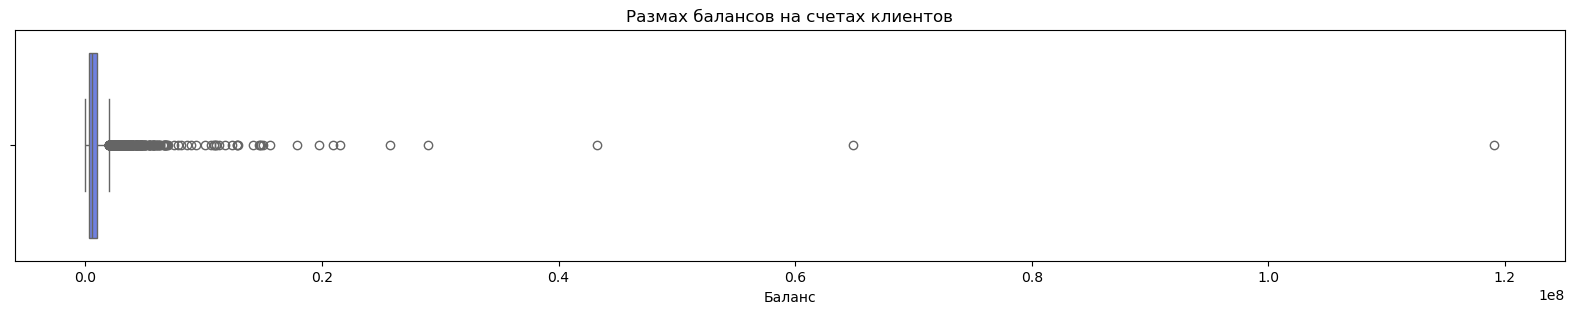

In [55]:
plt.figure(figsize=(20, 3))
# установка размера графика
boxplot = sns.boxplot(data=data, x='balance', color='#5d74f4')
# построение диаграмм размаха для значений столбца ‘balance’
boxplot.axes.set_title('Размах балансов на счетах клиентов', 
                       fontsize=12)
# установка заголовка для графика
boxplot.set_xlabel('Баланс', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.show()
# отображение графика

На графике можно наблюдать выбросы. Выведем строки датафрейма `data`, где баланс на счёте клиента больше 40 млн.

In [57]:
data.query('balance > 40000000')
# вывод строк датафрейма ‘data’ с условием, 
# что значения столбца ‘balance’ больше 40 млн.

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1059,114103,894,Ярославль,М,58,4,6.486621e+07,2,1,1,88861.60,1
1846,114088,927,Ярославль,М,57,5,4.327710e+07,3,0,1,82619.00,0
7597,156149,900,Ярославль,М,62,5,1.191136e+08,2,1,1,138041.31,0


У трёх клиентов банка баланс на счёте превышает 40 млн. Самый большой баланс составляет более 119 млн. Все клиенты с очень высоким балансом из Ярославля, являются мужчинами и активными клиентами банка. Возраст этих клиентов — 57 лет и старше. Их оценочный доход — более 80 тыс. Их кредитный скоринг является достаточно высоким (составляет около 900 баллов из 1000 возможных).

Построим диаграмму размаха по оценочным доходам клиентов.

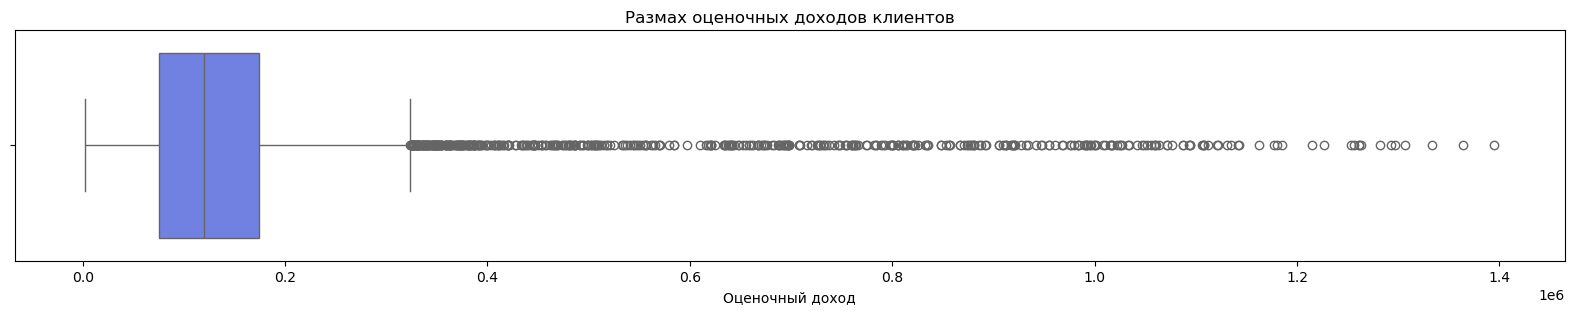

In [60]:
plt.figure(figsize=(20, 3))
# установка размера графика
boxplot = sns.boxplot(data=data, 
x='est_salary', color='#5d74f4')
# построение диаграмм размаха 
# для значений столбца ‘est_salary’
boxplot.axes.set_title(
'Размах оценочных доходов клиентов', fontsize=12)
# установка заголовка для графика
boxplot.set_xlabel('Оценочный доход', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.show()
# отображение графика

Существуют клиенты банка с очень высоким уровнем дохода по сравнению с большинством. Выведем строки датафрейма `data`, где оценочный доход клиента больше 1.3 млн.

In [62]:
data.query('est_salary > 1300000')
# вывод строк датафрейма ‘data’ с условием, 
# что значения столбца ‘est_salary’ больше 1.3 млн.

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1600,197637,785,Ярославль,М,41,0,NaN,1,1,0,1307090.18,0
4005,163640,912,Ярославль,М,35,4,15624095.80,2,0,1,1395064.45,0
4473,216422,956,Ярославль,М,27,0,NaN,1,1,0,1333687.36,0
4637,149430,961,Ярославль,М,37,5,4054667.81,3,0,0,1363549.52,0


Четыре человека, у кого оценочный доход превышает 1.3 млн., являются представителями мужского пола, жителями Ярославля, действующими клиентами банка (не ушли из банка). Кредитный скоринг трёх клиентов с наибольшим доходом составляет более 900 баллов.

Не будем удалять выбросы, так как существует риск потери важных данных. Клиентов с крупным балансом на счёте и высоким доходом не так много, но они могут приносить больше выгоды для банка, чем остальные клиенты.

Установим, сколько клиентов пользуются определённым количеством продуктов банка.

In [66]:
data['products'].value_counts()
# подсчёт количества уникальных значений 
# в столбце ‘products’ датафрейма ‘data’

products
2    5119
1    3323
3    1038
4     474
5      19
0       1
Name: count, dtype: int64

В данных встречается одно аномальное значение — нулевое количество банковских продуктов, которыми пользуется клиент. Если человек является клиентом банка, то он должен пользоваться хотя бы одним продуктом. Выведем строку с данным значением.

In [68]:
data.query('products == 0')
# вывод строк датафрейма ‘data’ с условием, 
# что значения столбца ‘products’ равны 0

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


Женщина из Рыбинска, не пользующаяся банковскими продуктами, является бывшим клиентом банка. Информация о её балансе на счёте отсутствует. Она не имела кредитной карты, не проявляла активности в последнее время. Удалим строку с данным клиентом из датафрейма `data`, чтобы избежать искажения результатов при анализе данных.

In [70]:
len_df = len(data)
# запись в переменную ‘len_df’ значения длины 
# датафрейма ‘data’ до удаления аномалии
data = data.drop(index=8957)
# удаление строки с индексом 8957 из датафрейма ‘data’
print('Длина датафрейма до удаления аномального значения:', 
len_df)
# вывод длины датафрейма ‘data’ до удаления аномалии
print('Длина датафрейма после удаления аномального значения:', 
len(data))
# вывод длины датафрейма ‘data’ после удаления аномалии
print('Доля удалённых данных:', 
round((len_df - len(data)) / len_df * 100, 2), '%')
# вычисление процента потерянных данных после удаления аномалии
# вычисление разницы между длиной датафрейма до удаления части данных
# и длиной датафрейма, полученного после удаления, 
# деление полученной разницы 
# на длину датафрейма до удаления и умножение на 100 
# округление результата до 2-х знаков после запятой

Длина датафрейма до удаления аномального значения: 9974
Длина датафрейма после удаления аномального значения: 9973
Доля удалённых данных: 0.01 %


После удаления аномального значения потеря данных составила лишь 0.01%.

Определим, сколько всего данных было потеряно в результате предобработки данных.

In [73]:
print('Длина датафрейма до удаления пропущенных и аномальных значений:', 
len_original_df)
# вывод длины датафрейма ‘data’ до удаления пропусков и аномалии
print('Длина датафрейма после удаления пропущенных и аномальных значений:', 
len(data))
# вывод длины датафрейма ‘data’ после удаления пропусков и аномалии
print('Доля удалённых данных:', 
round((len_original_df - len(data)) / len_original_df * 100, 2), '%')
# вычисление процента потерянных данных после удаления пропусков и аномалии
# вычисление разницы между длиной исходного датафрейма и длиной датафрейма, 
# полученного после удаления данных, 
# деление полученной разницы на длину исходного датафрейма и умножение на 100 
# округление результата до 2-х знаков после запятой

Длина датафрейма до удаления пропущенных и аномальных значений: 10000
Длина датафрейма после удаления пропущенных и аномальных значений: 9973
Доля удалённых данных: 0.27 %


В результате удаления пропущенных и аномальных значений было потеряно меньше одного процента данных — 0.27%.

Выведем информацию о датафрейме `data` после предобработки данных.

In [76]:
df_info(data, 'data')
# вызов функции df_info для датафрейма ‘data’

 Таблица «data» 
<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int64  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int64  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1012.9+ KB
None
--------------------------------------------------------------------------------


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9973.000000,9973.000000,9973.000000,9973.000000,7.695000e+03,9973.000000,9973.000000,9973.000000,9.973000e+03,9973.000000
mean,171757.616966,848.671212,42.730773,2.630803,8.272456e+05,1.871653,0.680237,0.522912,1.477991e+05,0.182292
std,33696.365256,65.393153,12.175166,1.980060,1.980327e+06,0.792547,0.466408,0.499500,1.392871e+05,0.386105
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142757.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525202e+04,0.000000
50%,172651.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196431e+05,0.000000
75%,201164.000000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.745000e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


--------------------------------------------------------------------------------
 Количество дубликатов в таблице «data»: 0 , процент дубликатов: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «user_id» - количество NaN: 0 , процент NaN: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «score» - количество NaN: 0 , процент NaN: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «city» - количество NaN: 0 , процент NaN: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «gender» - количество NaN: 0 , процент NaN: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «age» - количество NaN: 0 , процент NaN: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «equity» - количество NaN: 0 , процент NaN: 0.0 % 
------

После предобработки данных в датафрейме `data` стало 9 тыс. 973 строки и 12 столбцов. Восемь столбцов содержат целые числа (`'user_id'`, `'score'`, `'age'`, `'equity'`, `'products'`, `'credit_card'`, `'last_activity'`, `'churn'`), два столбца — вещественные числа (`'balance'`, `'est_salary'`) и два столбца — данные с типом object (`'city'`, `'gender'`). Пропущенные значения существуют в столбце `'balance'` (22.84%). Дубликаты в датафрейме `data` отсутствуют.

### Вывод

Мы считали csv-файл с данными о клиентах банка «Метанпром» и сохранили в датафрейм. Вывели первые строки набора данных. 

Изучили общую информацию о датафрейме. Установили, что существуют пропуски в столбцах датафрейма с возрастами клиентов и балансами на счетах. 

Анализ показал, что пропущенные значения в столбце с возрастами клиентов банка имеют очень слабую корреляцию с остальными столбцами, близкую к нулю. В данном столбце содержится небольшое количество пропусков (0.26% от общего числа наблюдений), они были удалены.

Между пропусками в балансах на счетах клиентов и количеством баллов собственности существует очень высокая корреляция — 0.98. Как правило, клиенты банка, у которых не указан баланс на счёте, имеют нулевое количество баллов собственности. Между пропусками в балансах и некоторыми другими переменными также есть зависимость. Пропущенные значения в столбце с балансами на счетах клиентов не были удалены, чтобы избежать потери большого количества значимых данных (22.95%). 

Явные и неявные дубликаты не были найдены. 

Название столбца с оценочными доходами клиентов банка было приведено к нижнему регистру. Название столбца с идентификаторами клиентов было приведено к «змеиному» регистру. 

Данные в столбцах с баллами кредитного скоринга и возрастами клиентов были преобразованы в целочисленный тип. 

Были проанализированы выбросы. В данных встретилось и было удалено одно аномальное значение — нулевое количество банковских продуктов, которыми пользуется клиент. 

В результате удаления пропущенных и аномальных значений было потеряно меньше одного процента данных — 0.27%.

## Исследовательский анализ данных

### Изучение распределений по всем признакам с разбивкой по признаку оттока

Определим, сколько в датасете встречается клиентов, которые ушли из банка и которые остались.

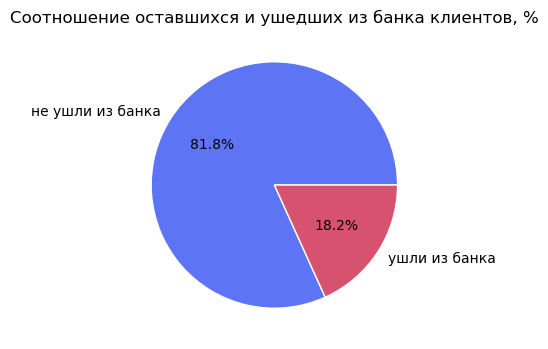

,Признак оттока,Количество клиентов
0,0,8155
1,1,1818


In [83]:
number_of_clients_with_and_without_churn = data[
'churn'].value_counts().reset_index()
# подсчёт количества значений 
# в столбце ‘churn’ датафрейма ‘data’
# сброс индекса
number_of_clients_with_and_without_churn.columns = [
'Признак оттока', 'Количество клиентов']
# присваивание названий столбцам 
# таблицы ‘number_of_clients_with_and_without_churn’
plt.figure(figsize=(4, 4))
# установка размера графика
plt.pie(data=number_of_clients_with_and_without_churn, 
x='Количество клиентов',  
labels=['не ушли из банка', 'ушли из банка'], 
colors=['#5d74f4', '#d7526f'], autopct='%.1f%%', 
wedgeprops={'edgecolor':'white'})
# построение круговой диаграммы
plt.title('Соотношение оставшихся и ушедших из банка клиентов, %')
# установка заголовка для графика
plt.show()
# отображение графика
number_of_clients_with_and_without_churn
# вывод таблицы ‘number_of_clients_with_and_without_churn’ на экран

В выборке больше людей, которые остались клиентами банка на момент сбора данных, — 8 тыс. 155 человек, что составляет 81.8% от общего числа клиентов. 1 тыс. 818 человек ушли из банка — это 18.2%.

Изучим распределение клиентов банка по полу с разделением по признаку оттока.

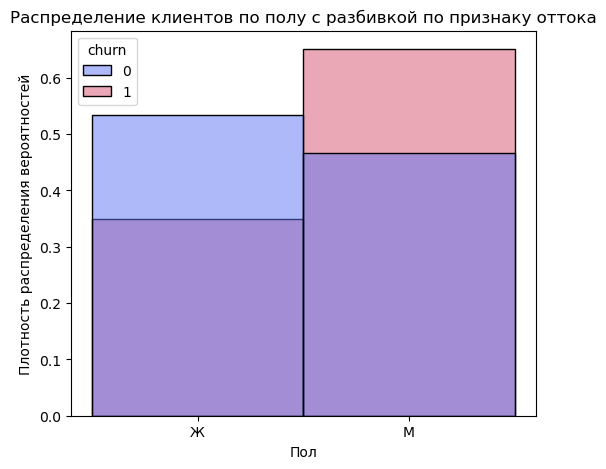

In [86]:
plt.figure(figsize=(6, 5))
# установка размера графика
sns.histplot(data=data, x='gender', hue='churn', stat='density', 
common_norm=False, discrete=True, palette=['#5d74f4', '#d7526f'])
# построение нормализованной гистограммы 
# по значениям столбца ‘gender’ датафрейма ‘data’
# с разбивкой по столбцу ‘churn’ датафрейма ‘data’
plt.title('Распределение клиентов по полу с разбивкой по признаку оттока', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Пол', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Плотность распределения вероятностей', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Среди клиентов мужского пола плотность распределения вероятностей выше у тех, кто ушёл из банка.

Рассчитаем процент клиентов, которые ушли из банка, отдельно для каждого пола. Сравним с общим процентом клиентов, ушедших из банка.

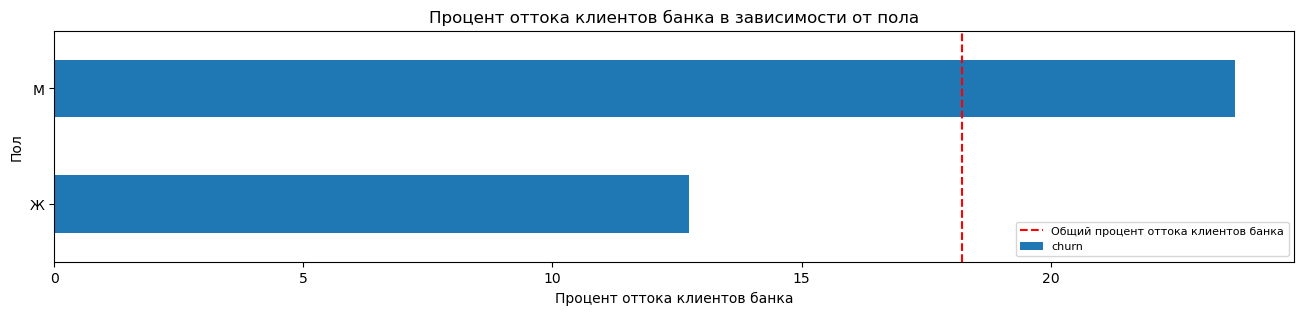

,Пол,"Процент клиентов, ушедших из банка"
0,Ж,12.7%
1,М,23.7%


In [89]:
churn_by_gender = (
data.groupby('gender')['churn'].mean().sort_values())
# группировка данных по столбцу ‘gender’ датафрейма ‘data’, 
# вычисление среднего значения столбца ‘churn’ для каждой группы, 
# сортировка полученных значений
fig, ax = plt.subplots(figsize=(16, 3))
# установка размера графика
(churn_by_gender * 100).plot(kind='barh', ax=ax)
# построение горизонтального барного графика 
# по ‘churn_by_gender’ с умножением на 100, 
# где длина каждого столбца соответствует 
# среднему значению ‘churn’ для соответствующей группы
plt.axvline(x=(data['churn'].mean() * 100), linestyle='--', 
color='red', label='Общий процент оттока клиентов банка')
# создание вертикального пунктира на графике
# расположение пунктирной линии на уровне среднего значения 
# столбца ‘churn’ датафрейма ‘data’
plt.legend(fontsize=8)
# отображение легенды на графике
plt.title('Процент оттока клиентов банка в зависимости от пола', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Процент оттока клиентов банка', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Пол', fontsize=10)
# установка подписи для вертикальной оси графика
churn_by_gender = churn_by_gender.reset_index()
# сброс индекса у таблицы ‘churn_by_gender’
churn_by_gender.columns = ['Пол', 
'Процент клиентов, ушедших из банка']
# присваивание названий столбцам таблицы ‘churn_by_gender’
churn_by_gender = churn_by_gender.style.format(
{'Процент клиентов, ушедших из банка': "{:.1%}"})
# отображение значений 
# столбца ‘Процент клиентов, ушедших из банка’
# таблицы ‘churn_by_gender’ 
# с 1-м знаком после запятой и в процентах
plt.show()
# отображение графика
churn_by_gender
# вывод таблицы ‘churn_by_gender’ на экран

Процент клиентов, покинувших банк, различается в зависимости от пола. Для женщин этот показатель равен 12.7%, что ниже общего уровня оттока — 18.2%. Среди мужчин доля оттока составляет 23.7%, что превышает общий показатель — 18.2%. Клиенты банка мужского пола более склонны к оттоку.

Изучим распределение клиентов банка по возрасту с разделением по признаку оттока.

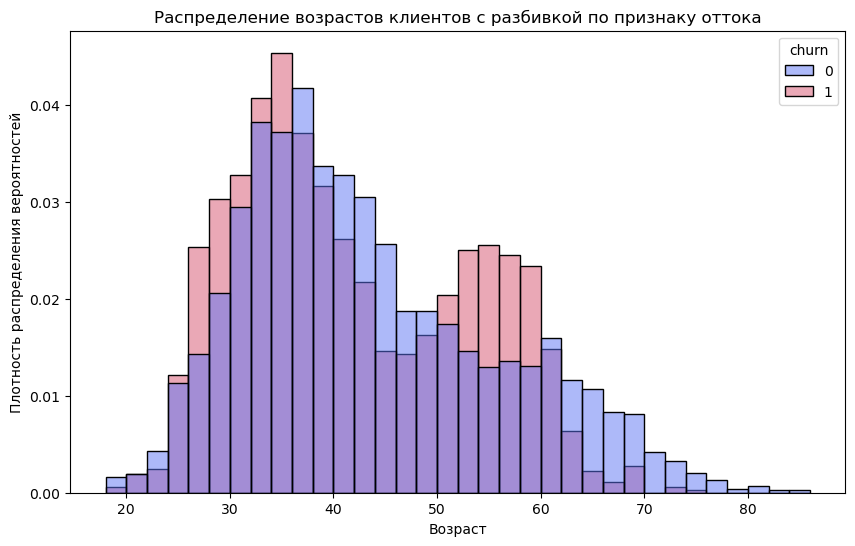

In [92]:
plt.figure(figsize=(10, 6))
# установка размера графика
sns.histplot(data=data, x='age', 
hue='churn', stat='density', 
common_norm=False, bins=34, 
palette=['#5d74f4', '#d7526f'])
# построение нормализованной гистограммы 
# по значениям столбца ‘age’ датафрейма ‘data’
# с разбивкой по столбцу ‘churn’ датафрейма ‘data’
plt.title(
'Распределение возрастов клиентов с разбивкой по признаку оттока', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Возраст', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Плотность распределения вероятностей', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Чаще всего встречаются клиенты банка в возрасте от 32 до 38 лет. Меньше всего клиентов 77 лет и старше.

Плотность распределения вероятностей выше у клиентов, которые ушли из банка, чем у тех, кто остался, в возрасте от 24 до 36 лет и от 50 до 60 лет.

Изучим распределение клиентов банка по городам с разделением по признаку оттока.

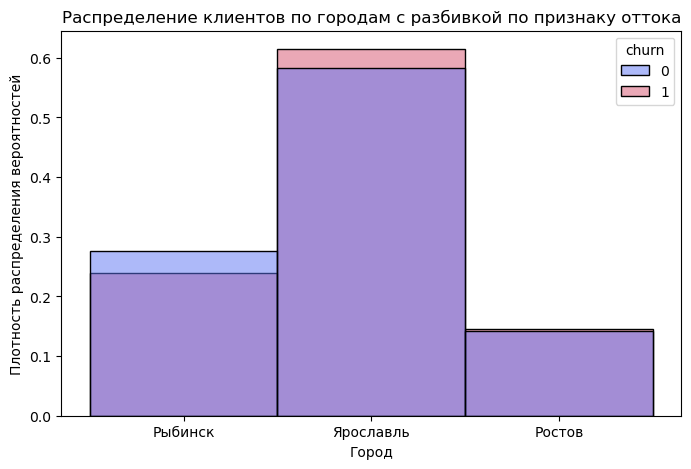

In [95]:
plt.figure(figsize=(8, 5))
# установка размера графика
sns.histplot(data=data, x='city', 
hue='churn', stat='density', 
common_norm=False, discrete=True, 
palette=['#5d74f4', '#d7526f'])
# построение нормализованной гистограммы 
# по значениям столбца ‘city’ датафрейма ‘data’
# с разбивкой по столбцу ‘churn’ датафрейма ‘data’
plt.title(
'Распределение клиентов по городам с разбивкой по признаку оттока', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Город', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Плотность распределения вероятностей', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Среди клиентов из Ярославля и Ростова плотность распределения вероятностей выше у тех, кто ушёл из банка.

Рассчитаем процент клиентов, которые ушли из банка, отдельно для каждого города. Сравним с общим процентом клиентов, ушедших из банка.

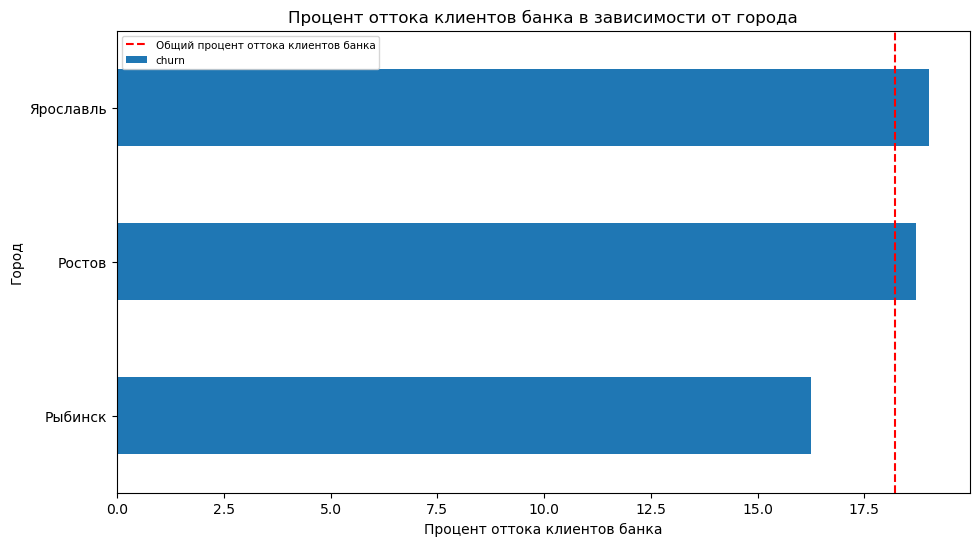

,Город,"Процент клиентов, ушедших из банка"
0,Рыбинск,16.3%
1,Ростов,18.7%
2,Ярославль,19.0%


In [98]:
churn_by_city = (
data.groupby('city')['churn'].mean().sort_values())
# группировка данных по столбцу ‘city’ датафрейма ‘data’, 
# вычисление среднего значения столбца ‘churn’ для каждой группы, 
# сортировка полученных значений
fig, ax = plt.subplots(figsize=(11, 6))
# установка размера графика
(churn_by_city * 100).plot(kind='barh', ax=ax)
# построение горизонтального барного графика 
# по ‘churn_by_city’ с умножением на 100
plt.axvline(x=(data['churn'].mean() * 100), 
linestyle='--', color='red', 
label='Общий процент оттока клиентов банка')
# создание вертикального пунктира на графике
# расположение пунктирной линии на уровне среднего значения 
# столбца ‘churn’ датафрейма ‘data’
plt.legend(fontsize=7.5)
# отображение легенды на графике
plt.title('Процент оттока клиентов банка в зависимости от города', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Процент оттока клиентов банка', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Город', fontsize=10);
# установка подписи для вертикальной оси графика
churn_by_city = churn_by_city.reset_index()
# сброс индекса у таблицы ‘churn_by_city’
churn_by_city.columns = ['Город', 
'Процент клиентов, ушедших из банка']
# присваивание названий столбцам таблицы ‘churn_by_city’
churn_by_city = churn_by_city.style.format(
{'Процент клиентов, ушедших из банка': "{:.1%}"})
# отображение значений столбца ‘Процент клиентов, ушедших из банка’
# таблицы ‘churn_by_city’ 
# с 1-м знаком после запятой и в процентах
plt.show()
# отображение графика
churn_by_city
# вывод таблицы ‘churn_by_city’ на экран

В разных городах процент клиентов, ушедших из банка, отличается. В Рыбинске доля ушедших составляет 16.3%, что меньше общего показателя оттока — 18.2%. В Ростове и Ярославле доля клиентов, ушедших из банка, равна 18.7% и 19% соответственно, что чуть выше общего уровня оттока — 18.2%. Таким образом, клиенты из Ростова и Ярославля более склонны к оттоку.

Изучим распределение клиентов банка по количеству баллов кредитного скоринга с разделением по признаку оттока.

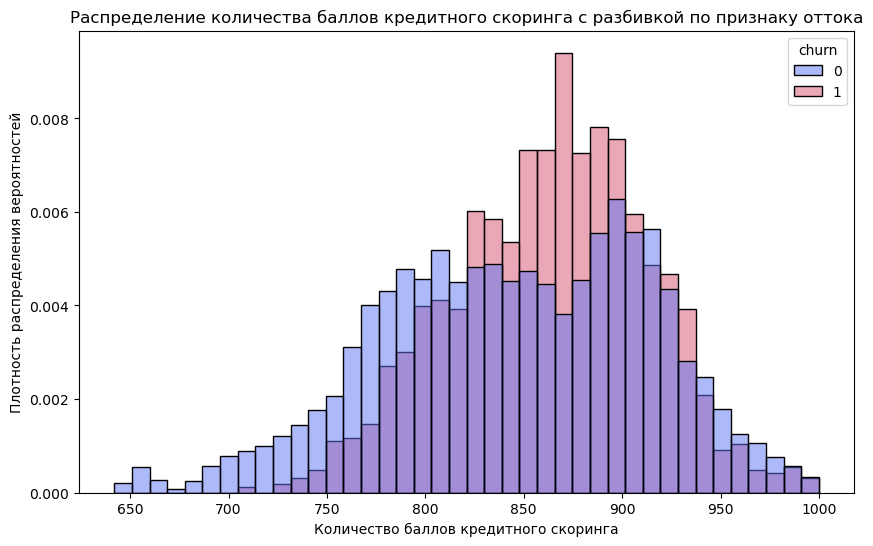

In [101]:
plt.figure(figsize=(10, 6))
# установка размера графика
sns.histplot(data=data, x='score', 
hue='churn', stat='density', 
common_norm=False, palette=['#5d74f4', '#d7526f'])
# построение нормализованной гистограммы 
# по значениям столбца ‘score’ датафрейма ‘data’
# с разбивкой по столбцу ‘churn’ датафрейма ‘data’
plt.title(
'Распределение количества баллов кредитного скоринга \
с разбивкой по признаку оттока', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Количество баллов кредитного скоринга', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Плотность распределения вероятностей', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Чаще всего встречаются клиенты банка, у которых кредитный скоринг составляет 850-900 баллов. Меньше всего клиентов с количеством баллов кредитного скоринга, равным 660-680.

Плотность распределения вероятностей выше у клиентов, которые ушли из банка, чем у тех, кто остался, с кредитным скорингом от 820 до 910 баллов и от 920 до 940 баллов.

Изучим распределение клиентов банка по количеству баллов собственности с разделением по признаку оттока.

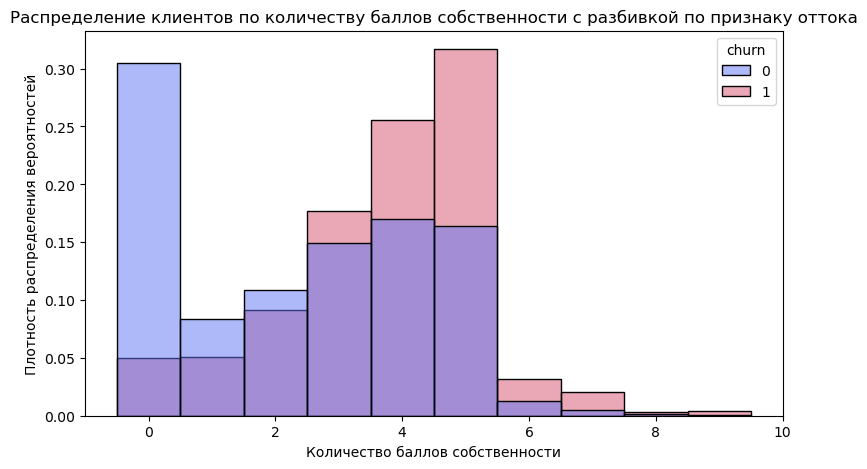

In [104]:
plt.figure(figsize=(9, 5))
# установка размера графика
sns.histplot(data=data, x='equity', 
hue='churn', stat='density', 
common_norm=False, discrete=True, 
palette=['#5d74f4', '#d7526f'])
# построение нормализованной гистограммы 
# по значениям столбца ‘equity’ датафрейма ‘data’
# с разбивкой по столбцу ‘churn’ датафрейма ‘data’
plt.title(
'Распределение клиентов по количеству баллов собственности \
с разбивкой по признаку оттока', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Количество баллов собственности', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Плотность распределения вероятностей', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Среди клиентов с тремя и более баллами собственности плотность распределения вероятностей выше у тех, кто ушёл из банка.

Рассчитаем процент клиентов, которые ушли из банка, по количеству баллов собственности. Сравним с общим процентом клиентов, ушедших из банка.

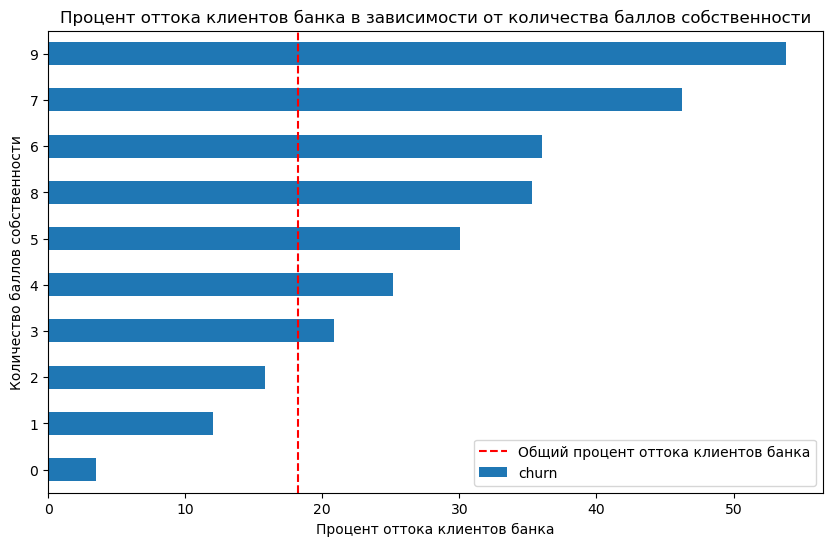

,Кол-во баллов собственности,"Процент клиентов, ушедших из банка"
0,0,3.5%
1,1,12.0%
2,2,15.8%
3,3,20.8%
4,4,25.1%
5,5,30.1%
6,8,35.3%
7,6,36.0%
8,7,46.2%
9,9,53.8%


In [107]:
churn_by_equity = (
data.groupby('equity')['churn'].mean().sort_values())
# группировка данных по столбцу ‘equity’ датафрейма ‘data’, 
# вычисление среднего значения столбца ‘churn’ для каждой группы, 
# сортировка полученных значений
fig, ax = plt.subplots(figsize=(10, 6))
# установка размера графика
(churn_by_equity * 100).plot(kind='barh', ax=ax)
# построение горизонтального барного графика 
# по ‘churn_by_equity’ с умножением на 100
plt.axvline(x=(data['churn'].mean() * 100), 
linestyle='--', color='red', 
label='Общий процент оттока клиентов банка')
# создание вертикального пунктира на графике
# расположение пунктирной линии на уровне среднего значения 
# столбца ‘churn’ датафрейма ‘data’
plt.legend()
# отображение легенды на графике
plt.title(
'Процент оттока клиентов банка \
в зависимости от количества баллов собственности', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Процент оттока клиентов банка', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Количество баллов собственности', fontsize=10);
# установка подписи для вертикальной оси графика
churn_by_equity = churn_by_equity.reset_index()
# сброс индекса у таблицы ‘churn_by_equity’
churn_by_equity.columns = ['Кол-во баллов собственности', 
'Процент клиентов, ушедших из банка']
# присваивание названий столбцам таблицы ‘churn_by_equity’
churn_by_equity = churn_by_equity.style.format(
{'Процент клиентов, ушедших из банка': "{:.1%}"})
# отображение значений столбца ‘Процент клиентов, ушедших из банка’
# таблицы ‘churn_by_equity’ 
# с 1-м знаком после запятой и в процентах
plt.show()
# отображение графика
churn_by_equity
# вывод таблицы ‘churn_by_equity’ на экран

Процент клиентов, покинувших банк и имеющих от 0 до 2 баллов собственности, ниже среднего показателя оттока. А процент ушедших из банка клиентов с количеством баллов собственности от 3 до 9 выше среднего значения оттока. То есть, клиенты с тремя и более баллами собственности более склонны к уходу из банка. В основном, чем выше балл собственности, тем больше процент оттока. Наибольший процент оттока характерен для клиентов банка с 9 баллами собственности — 53.8%.

Изучим распределение клиентов банка по балансу на счёте с разделением по признаку оттока.

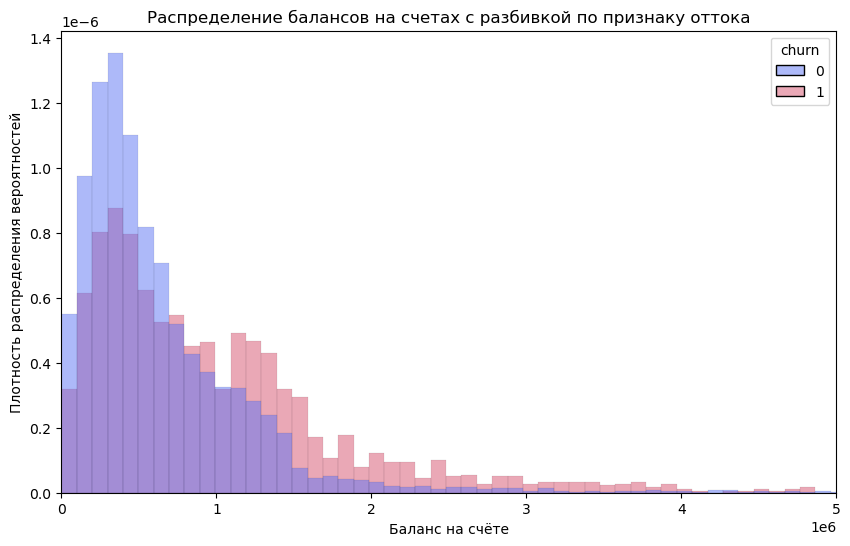

In [110]:
plt.figure(figsize=(10, 6))
# установка размера графика
sns.histplot(data=data, x='balance', 
hue='churn', stat='density', 
common_norm=False, bins=1200, 
palette=['#5d74f4', '#d7526f'])
# построение нормализованной гистограммы 
# по значениям столбца ‘balance’ датафрейма ‘data’
# с разбивкой по столбцу ‘churn’ датафрейма ‘data’
plt.xlim(0, 5000000)
# ограничение горизонтальной оси графика до 5 млн.
plt.title(
'Распределение балансов на счетах с разбивкой по признаку оттока', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Баланс на счёте', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Плотность распределения вероятностей', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Гистограмма имеет длинный хвост в правой части, так как в наборе данных есть значения баланса на счёте, которые значительно больше среднего. Для наглядности на графике баланс ограничен пятью миллионами. Чаще всего остатки на счетах клиентов банка находятся в диапазоне от нуля до 800 тысяч.

Вероятность ухода из банка выше среди клиентов с более высоким балансом на счёте — от 700 тысяч.

Изучим распределение клиентов банка по количеству используемых банковских продуктов с разделением по признаку оттока.

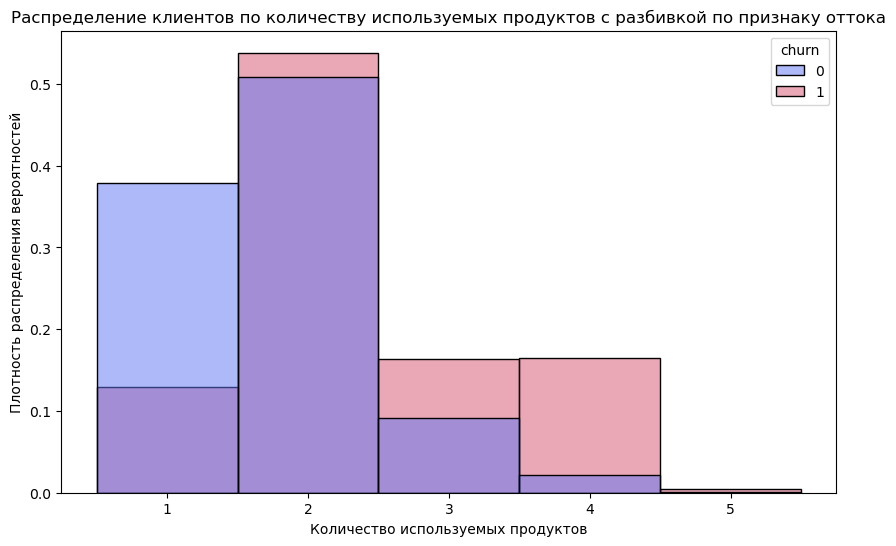

In [113]:
plt.figure(figsize=(10, 6))
# установка размера графика
sns.histplot(data=data, x='products', 
hue='churn', stat='density', 
common_norm=False, discrete=True, 
palette=['#5d74f4', '#d7526f'])
# построение нормализованной гистограммы 
# по значениям столбца ‘products’ датафрейма ‘data’
# с разбивкой по столбцу ‘churn’ датафрейма ‘data’
plt.title(
'Распределение клиентов по количеству используемых продуктов \
с разбивкой по признаку оттока', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Количество используемых продуктов', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Плотность распределения вероятностей', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Среди клиентов, пользующихся двумя и более продуктами, плотность распределения вероятностей выше у тех, кто ушёл из банка.

Рассчитаем процент клиентов, которые ушли из банка, по количеству используемых продуктов. Сравним с общим процентом клиентов, ушедших из банка.

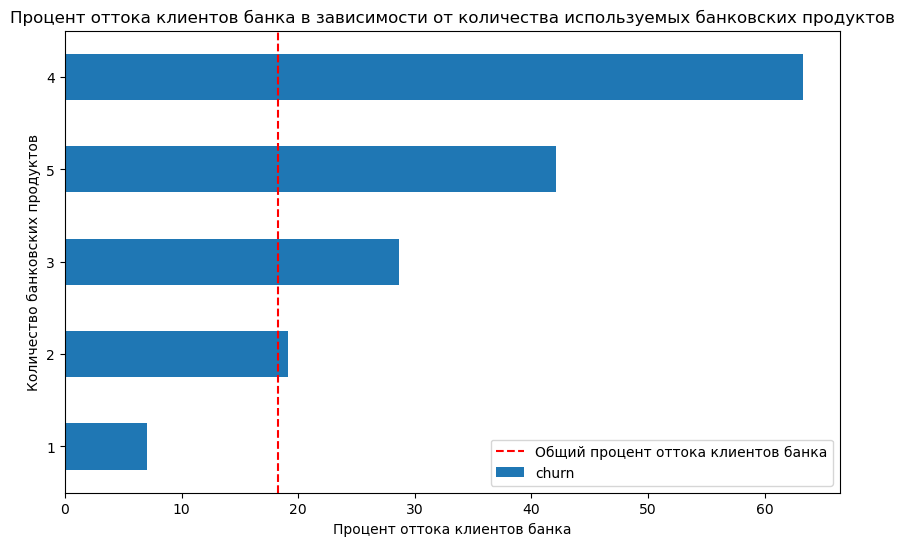

,Кол-во банковских продуктов,"Процент клиентов, ушедших из банка"
0,1,7.1%
1,2,19.1%
2,3,28.6%
3,5,42.1%
4,4,63.3%


In [116]:
churn_by_products = (
data.groupby('products')['churn'].mean().sort_values())
# группировка данных по столбцу ‘products’ датафрейма ‘data’, 
# вычисление среднего значения столбца ‘churn’ для каждой группы, 
# сортировка полученных значений
fig, ax = plt.subplots(figsize=(10, 6))
# установка размера графика
(churn_by_products * 100).plot(kind='barh', ax=ax)
# построение горизонтального барного графика 
# по ‘churn_by_products’ с умножением на 100
plt.axvline(x=(data['churn'].mean() * 100), 
linestyle='--', color='red', 
label='Общий процент оттока клиентов банка')
# создание вертикального пунктира на графике
# расположение пунктирной линии 
# на уровне среднего значения столбца ‘churn’ датафрейма ‘data’
plt.legend()
# отображение легенды на графике
plt.title(
'Процент оттока клиентов банка в зависимости \
от количества используемых банковских продуктов', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Процент оттока клиентов банка', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Количество банковских продуктов', fontsize=10);
# установка подписи для вертикальной оси графика
churn_by_products = churn_by_products.reset_index()
# сброс индекса у таблицы ‘churn_by_products’
churn_by_products.columns = ['Кол-во банковских продуктов', 
                             'Процент клиентов, ушедших из банка']
# присваивание названий столбцам таблицы ‘churn_by_products’
churn_by_products = churn_by_products.style.format(
{'Процент клиентов, ушедших из банка': "{:.1%}"})
# отображение значений столбца ‘Процент клиентов, ушедших из банка’
# таблицы ‘churn_by_products’ 
# с 1-м знаком после запятой и в процентах
plt.show()
# отображение графика
churn_by_products
# вывод таблицы ‘churn_by_products’ на экран

Клиенты, использующие несколько банковских продуктов, более склонны к уходу из банка. Процент оттока клиентов банка, пользующихся одним банковским продуктом, ниже общего процента оттока клиентов. Среди клиентов, которые пользуются двумя и более банковскими продуктами, процент оттока выше общего показателя оттока. Всех выше процент оттока у тех, кто пользуется четырьмя продуктами, — 63.3%.

Изучим распределение клиентов банка по наличию кредитной карты с разделением по признаку оттока.

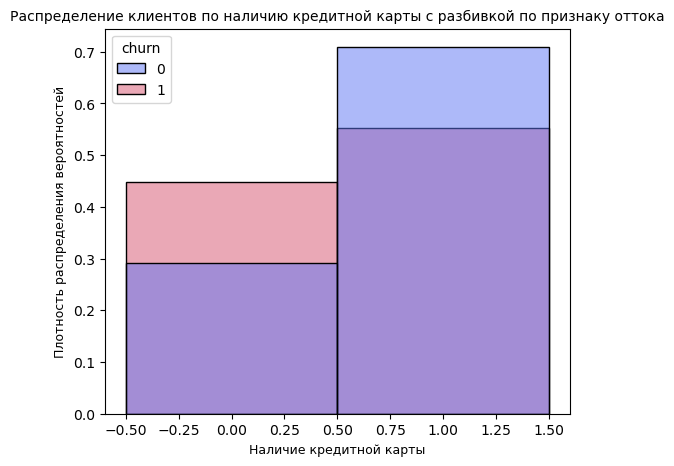

In [119]:
plt.figure(figsize=(6, 5))
# установка размера графика
sns.histplot(data=data, x='credit_card', 
             hue='churn', stat='density', 
             common_norm=False, discrete=True, 
             palette=['#5d74f4', '#d7526f'])
# построение нормализованной гистограммы 
# по значениям столбца ‘credit_card’ датафрейма ‘data’
# с разбивкой по столбцу ‘churn’ датафрейма ‘data’
plt.title(
'Распределение клиентов по наличию кредитной карты \
с разбивкой по признаку оттока', 
fontsize=10)
# установка заголовка для графика
plt.xlabel('Наличие кредитной карты', fontsize=9)
# установка подписи для горизонтальной оси графика
plt.ylabel('Плотность распределения вероятностей', fontsize=9)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Среди клиентов, не имеющих кредитной карты, плотность распределения вероятностей выше у тех, кто ушёл из банка.

Рассчитаем процент клиентов, которые ушли из банка, по наличию кредитной карты. Сравним с общим процентом клиентов, ушедших из банка.

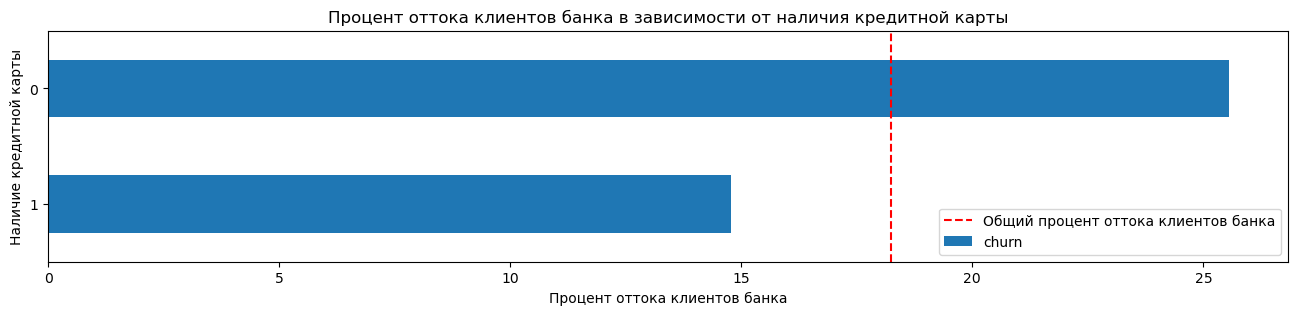

,Наличие кредитной карты,"Процент клиентов, ушедших из банка"
0,1,14.8%
1,0,25.6%


In [122]:
churn_by_credit_card = (
data.groupby('credit_card')['churn'].mean().sort_values())
# группировка данных по столбцу ‘credit_card’ датафрейма ‘data’, 
# вычисление среднего значения столбца ‘churn’ для каждой группы, 
# сортировка полученных значений
fig, ax = plt.subplots(figsize=(16, 3))
# установка размера графика
(churn_by_credit_card * 100).plot(kind='barh', ax=ax)
# построение горизонтального барного графика 
# по ‘churn_by_credit_card’ с умножением на 100
plt.axvline(x=(data['churn'].mean() * 100), 
linestyle='--', color='red', 
label='Общий процент оттока клиентов банка')
# создание вертикального пунктира на графике
# расположение пунктирной линии 
# на уровне среднего значения столбца ‘churn’ датафрейма ‘data’
plt.legend()
# отображение легенды на графике
plt.title(
'Процент оттока клиентов банка в зависимости от наличия кредитной карты', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Процент оттока клиентов банка', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Наличие кредитной карты', fontsize=10);
# установка подписи для вертикальной оси графика
churn_by_credit_card = churn_by_credit_card.reset_index()
# сброс индекса у таблицы ‘churn_by_credit_card’
churn_by_credit_card.columns = ['Наличие кредитной карты', 
'Процент клиентов, ушедших из банка']
# присваивание названий столбцам таблицы ‘churn_by_credit_card’
churn_by_credit_card = churn_by_credit_card.style.format(
{'Процент клиентов, ушедших из банка': "{:.1%}"})
# отображение значений столбца ‘Процент клиентов, ушедших из банка’
# таблицы ‘churn_by_credit_card’ 
# с 1-м знаком после запятой и в процентах
plt.show()
# отображение графика
churn_by_credit_card
# вывод таблицы ‘churn_by_credit_card’ на экран

У клиентов с кредитными картами процент ушедших из банка составляет 14.8%, что меньше общего процента оттока (18.2%). Процент ушедших из банка клиентов без кредитных карт превышает общий процент оттока — 25.6%. Таким образом, клиенты, не имеющие кредитных карт, более склонны к оттоку.

Изучим распределение клиентов банка по проявлению активности с разделением по признаку оттока.

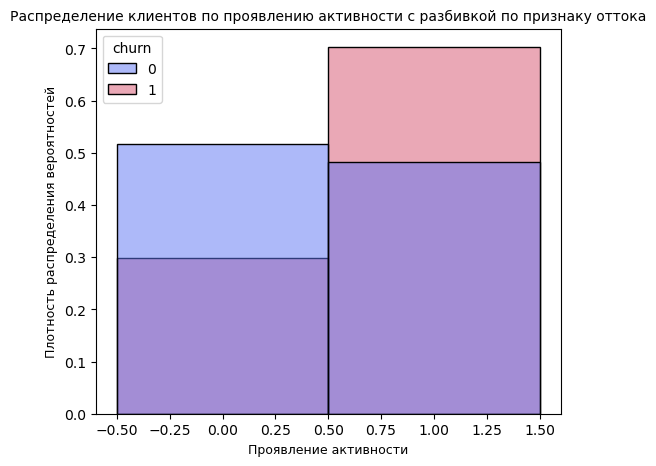

In [125]:
plt.figure(figsize=(6, 5))
# установка размера графика
sns.histplot(data=data, x='last_activity', 
             hue='churn', stat='density', 
             common_norm=False, discrete=True, 
             palette=['#5d74f4', '#d7526f'])
# построение нормализованной гистограммы 
# по значениям столбца ‘last_activity’ датафрейма ‘data’
# с разбивкой по столбцу ‘churn’ датафрейма ‘data’
plt.title(
'Распределение клиентов по проявлению активности \
с разбивкой по признаку оттока', 
fontsize=10)
# установка заголовка для графика
plt.xlabel('Проявление активности', fontsize=9)
# установка подписи для горизонтальной оси графика
plt.ylabel('Плотность распределения вероятностей', fontsize=9)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Среди активных клиентов плотность распределения вероятностей выше у тех, кто ушёл из банка.

Рассчитаем процент клиентов, которые ушли из банка, по проявлению активности. Сравним с общим процентом клиентов, ушедших из банка.

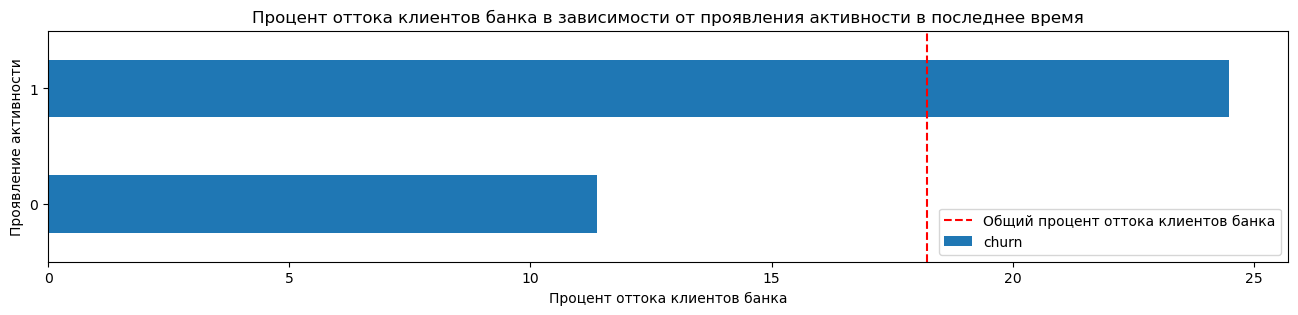

,Проявление активности,"Процент клиентов, ушедших из банка"
0,0,11.4%
1,1,24.5%


In [128]:
churn_by_last_activity = (
data.groupby('last_activity')['churn'].mean().sort_values())
# группировка данных по столбцу ‘last_activity’ датафрейма ‘data’,
# вычисление среднего значения столбца ‘churn’ для каждой группы,
# сортировка полученных значений
fig, ax = plt.subplots(figsize=(16, 3))
# установка размера графика
(churn_by_last_activity * 100).plot(kind='barh', ax=ax)
# построение горизонтального барного графика 
# по ‘churn_by_last_activity’ с умножением на 100
plt.axvline(x=(data['churn'].mean() * 100), 
linestyle='--', color='red', 
label='Общий процент оттока клиентов банка')
# создание вертикального пунктира на графике
# расположение пунктирной линии 
# на уровне среднего значения столбца ‘churn’ датафрейма ‘data’
plt.legend()
# отображение легенды на графике
plt.title(
'Процент оттока клиентов банка \
в зависимости от проявления активности в последнее время', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Процент оттока клиентов банка', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Проявление активности', fontsize=10);
# установка подписи для вертикальной оси графика
churn_by_last_activity = churn_by_last_activity.reset_index()
# сброс индекса у таблицы ‘churn_by_last_activity’
churn_by_last_activity.columns = ['Проявление активности', 
'Процент клиентов, ушедших из банка']
# присваивание названий столбцам таблицы ‘churn_by_last_activity’
churn_by_last_activity = churn_by_last_activity.style.format(
{'Процент клиентов, ушедших из банка': "{:.1%}"})
# отображение значений столбца ‘Процент клиентов, ушедших из банка’
# таблицы ‘churn_by_last_activity’ 
# с 1-м знаком после запятой и в процентах
plt.show()
# отображение графика
churn_by_last_activity
# вывод таблицы ‘churn_by_last_activity’ на экран

Среди клиентов банка, которые не совершали активных действий в последнее время (не было движения средств), доля оттока составляет 11.4%, что ниже общего показателя оттока (18.2%). У тех клиентов, кто был активным в последнее время, доля оттока составляет 24.5%, что превышает общий процент оттока. Это указывает на то, что активные клиенты банка более склонны к оттоку.

Изучим распределение клиентов банка по оценочному доходу с разделением по признаку оттока.

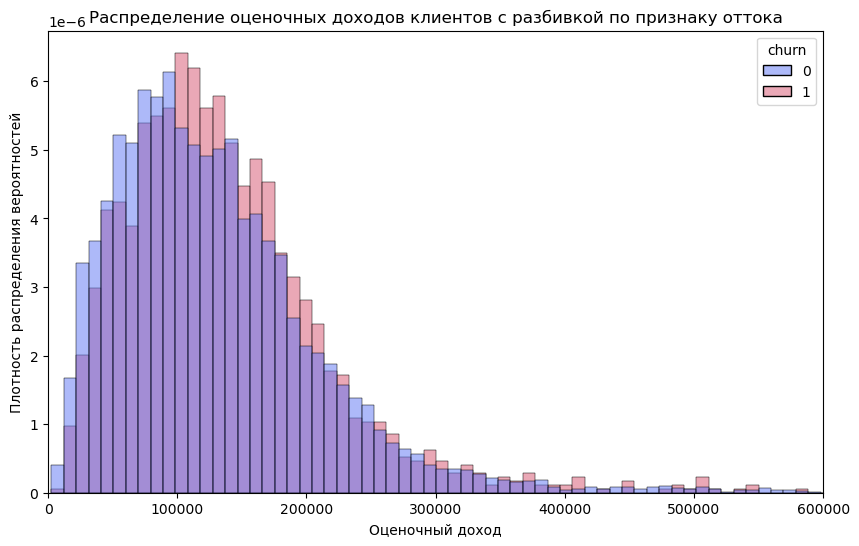

In [131]:
plt.figure(figsize=(10, 6))
# установка размера графика
sns.histplot(data=data, x='est_salary', 
hue='churn', stat='density', common_norm=False, 
bins=145, palette=['#5d74f4', '#d7526f'])
# построение нормализованной гистограммы 
# по значениям столбца ‘est_salary’ датафрейма ‘data’
# с разбивкой по столбцу ‘churn’ датафрейма ‘data’
plt.xlim(0, 600000)
# ограничение горизонтальной оси графика до 600 тыс.
plt.title(
'Распределение оценочных доходов клиентов с разбивкой по признаку оттока', 
fontsize=12)
# установка заголовка для графика
plt.xlabel('Оценочный доход', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Плотность распределения вероятностей', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Гистограмма имеет длинный правый «хвост», так как в датасете присутствуют значения оценочного дохода, значительно превышающие среднее значение. Для наглядности на графике доход ограничен 600 тысячами. Чаще всего клиенты оценивают свой доход в пределах от 50 до 150 тысяч.

Вероятность ухода из банка выше среди клиентов с оценочным доходом от 100 до 210 тысяч.

### Составление и сравнение портретов типичных клиентов, которые склонны и не склонны уходить из банка

Портрет типичных клиентов, которые менее склонны к уходу из банка:

- женщины;

- 18-23 года, 37-49 лет, 61-86 лет;

- город Рыбинск;

- кредитный скоринг: 642-819 баллов, 911-919 баллов, 941-1000 баллов;

- 0-2 балла собственности;

- баланс на счёте: от 0 до 700 тыс.;

- 1 банковский продукт;

- есть кредитная карта;

- неактивные клиенты;

- оценочный доход: от 2 тыс. 546 до 100 тыс.

Портрет типичных клиентов, которые более склонны к уходу из банка:

- мужчины;

- 24-36 лет, 50-60 лет;

- город Ростов, город Ярославль;

- кредитный скоринг: 820-910 баллов, 920-940 баллов;

- 3-9 баллов собственности;

- баланс на счёте: от 700 тыс.;

- 2-5 банковских продуктов;

- нет кредитной карты;

- активные клиенты;

- оценочный доход: 100-210 тыс.

Рассчитем количество клиентов, менее и более склонных к уходу из банка по всем признакам.
Также рассчитем количество и процент ушедших из банка клиентов среди клиентов, менее склонных к уходу из банка по всем признакам, и среди клиентов, более склонных к уходу из банка по всем признакам.

In [136]:
clients_less_prone_to_churn = data.query('(gender == "Ж") \
and ((age <= 23) or (age >= 37 and age <= 49) or (age >= 61)) \
and (city == "Рыбинск") and ((score >= 642 and score <= 819) \
or (score >= 911 and score <= 919) or (score >= 941)) \
and (equity <= 2) and (balance < 700000) and (products == 1) \
and (credit_card == 1) and (last_activity == 0) \
and (est_salary <= 100000)')
# задание условий для значений столбцов датафрейма ‘data’
# запись в переменную ‘clients_less_prone_to_churn’ 
# отфильтрованного датафрейма ‘data’
clients_more_prone_to_churn = data.query('(gender == "М") \
and ((age >= 24 and age <= 36) or (age >= 50 and age <= 60)) \
and (city == "Ростов" or city == "Ярославль") \
and ((score >= 820 and score <= 910) \
or (score >= 920 and score <= 940)) \
and (equity >= 3) and (balance >= 700000) \
and (products >= 2) and (credit_card == 0) \
and (last_activity == 1) \
and (est_salary >= 100000 and est_salary <= 210000)')
# задание условий для значений столбцов датафрейма ‘data’
# запись в переменную ‘clients_more_prone_to_churn’ 
# отфильтрованного датафрейма ‘data’
print(
'Общее количество клиентов, менее склонных к уходу из банка по всем признакам:', 
len(clients_less_prone_to_churn))
# вычисление длины датафрейма ‘clients_less_prone_to_churn’
print('Количество ушедших из банка клиентов среди всех клиентов, \
менее склонных к уходу из банка по всем признакам:', 
len(clients_less_prone_to_churn.query('churn == 1')))
# вычисление длины датафрейма ‘clients_less_prone_to_churn’ с условием, 
# что значения столбца ‘churn’ равны 1
print('Процент ушедших из банка клиентов от общего числа клиентов, \
менее склонных к уходу из банка по всем признакам:', 
round(clients_less_prone_to_churn['churn'].mean() * 100), '%')
# вычисление среднего значения столбца ‘churn’ 
# датафрейма ‘clients_less_prone_to_churn’, 
# умножение на 100 и округление
print('Общее количество клиентов, \
более склонных к уходу из банка по всем признакам:', 
len(clients_more_prone_to_churn))
# вычисление длины датафрейма ‘clients_more_prone_to_churn’
print('Количество ушедших из банка клиентов среди всех клиентов, \
более склонных к уходу из банка по всем признакам:', 
len(clients_more_prone_to_churn.query('churn == 1')))
# вычисление длины датафрейма ‘clients_more_prone_to_churn’ 
# с условием, что значения столбца ‘churn’ равны 1
print('Процент ушедших из банка клиентов от общего числа клиентов, \
более склонных к уходу из банка по всем признакам:', 
round(clients_more_prone_to_churn['churn'].mean() * 100), '%')
# вычисление среднего значения столбца ‘churn’ 
# датафрейма ‘clients_more_prone_to_churn’, умножение на 100 и округление

Общее количество клиентов, менее склонных к уходу из банка по всем признакам: 4
Количество ушедших из банка клиентов среди всех клиентов, менее склонных к уходу из банка по всем признакам: 0
Процент ушедших из банка клиентов от общего числа клиентов, менее склонных к уходу из банка по всем признакам: 0 %
Общее количество клиентов, более склонных к уходу из банка по всем признакам: 50
Количество ушедших из банка клиентов среди всех клиентов, более склонных к уходу из банка по всем признакам: 44
Процент ушедших из банка клиентов от общего числа клиентов, более склонных к уходу из банка по всем признакам: 88 %


Четверо клиентов полностью подходят под описание тех, кто менее склонен к уходу из банка. Все они являются действующими клиентами банка — 0% составляют ушедшие из банка клиенты от общего числа клиентов, менее склонных к уходу из банка по всем признакам.
    
50 клиентов полностью подходят под описание тех, кто более склонен к уходу из банка. 44 из них являются бывшими клиентами банка — 88% составляют ушедшие из банка клиенты от общего числа клиентов, более склонных к уходу из банка по всем признакам.

### Корреляционный анализ

Вычислим коэффициенты корреляции phik между всеми парами столбцов датафрейма `data`, кроме столбца `'user_id'`. Визуализируем корреляционную матрицу с помощью тепловой карты.

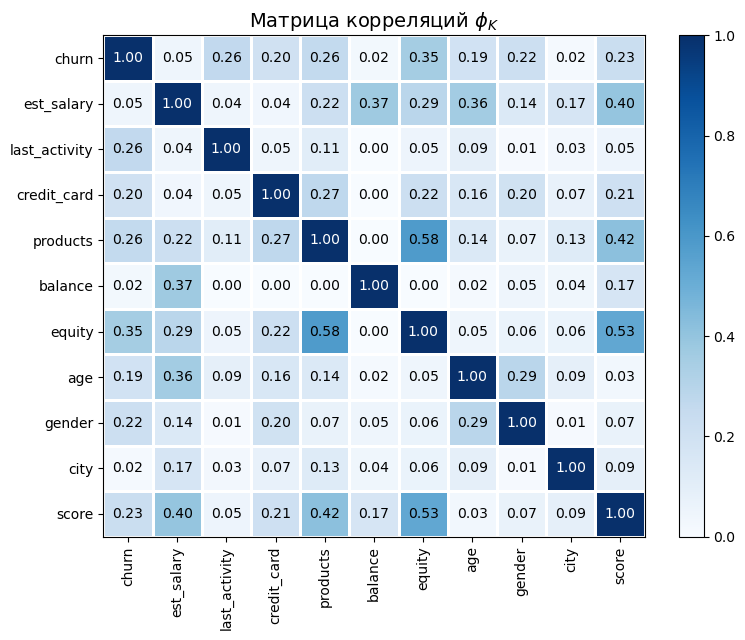

In [140]:
phik_matrix = data.drop('user_id', 
axis=1).phik_matrix(
interval_cols=['score', 'age', 
'balance', 'est_salary'])
# рассчёт корреляционной матрицы
# вычисление коэффициента корреляции phik 
# между всеми парами столбцов датафрейма ‘data’, 
# кроме столбца ‘user_id’
# указание столбцов ‘balance’, ‘est_salary’ 
# в качестве непрерывных признаков
plot_correlation_matrix(phik_matrix.values, 
x_labels=phik_matrix.columns, y_labels=phik_matrix.index, 
                        vmin=0, vmax=1, color_map='Blues', 
                        title=r'Матрица корреляций $\phi_K$', 
                        fontsize_factor=1, figsize=(8, 6.5))
# создание тепловой карты на основе корреляционной матрицы
plt.tight_layout()
# автоматическая настройка расположения элементов графика
plt.show()
# отображение графика

Наибольший коэффициент корреляции среди всех пар переменных составляет 0.58 и указывает на связь между количеством баллов собственности и количеством банковских продуктов.

Рассчитаем медианное количество баллов собственности у клиентов, пользующихся одним и несколькими банковскими продуктами.

In [142]:
print('Медианное количество баллов собственности у клиентов, \
пользующихся одним банковским продуктом:', 
round(data.query('products == 1')['equity'].median()))
# расчёт медианного значения переменной ‘equity’ датафрейма ‘data’ при условии, 
# что значения столбца ‘products’ равны 1
print('Медианное количество баллов собственности у клиентов, \
пользующихся несколькими банковскими продуктами:', 
      round(data.query('products > 1')['equity'].median()))
# расчёт медианного значения переменной ‘equity’ датафрейма ‘data’ при условии, 
# что значения столбца ‘products’ больше 1

Медианное количество баллов собственности у клиентов, пользующихся одним банковским продуктом: 0
Медианное количество баллов собственности у клиентов, пользующихся несколькими банковскими продуктами: 4


У клиентов с одним банковским продуктом медианное количество баллов собственности равно нулю, а у клиентов с несколькими продуктами — четырём. Клиенты с большим количеством баллов собственности могут позволить себе пользоваться несколькими различными банковскими продуктами.

Отобразим только один столбец из матрицы корреляций. Определим силу связи между признаком оттока клиентов банка и другими переменными.

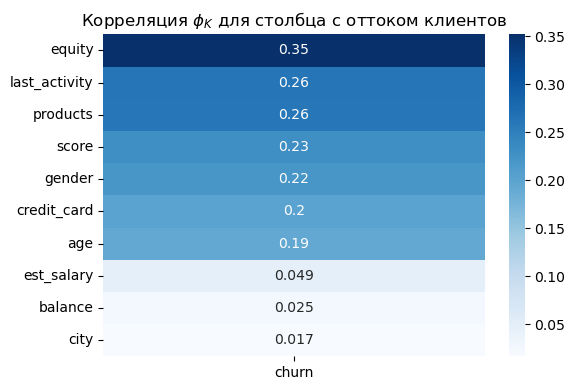

In [145]:
plt.figure(figsize=(6, 4))
# установка размера графика
sns.heatmap(phik_matrix.loc[:, ['churn']].drop('churn').sort_values(
'churn', ascending = False), annot=True, cmap='Blues')
# создание тепловой карты на основе всех строк, кроме ‘churn’, 
# и столбца ‘churn’ матрицы данных ‘phik_matrix’
# сортировка по убыванию значений столбца ‘churn’
plt.title(r'Корреляция $\phi_K$ для столбца с оттоком клиентов')
# установка заголовка для графика
plt.tight_layout()
# автоматическая настройка расположения элементов графика
plt.show()
# отображение графика

Наиболее сильная связь наблюдается между признаком оттока клиентов банка и количеством баллов собственности — 0.35. Как уже было отмечено ранее, чем больше баллов собственности, тем выше уровень оттока клиентов банка. Клиенты с большим количеством баллов собственности могут иметь более высокие доходы, что позволяет им выбирать лучшие условия обслуживания и принимать предложения от других банков.

Одинаковая сила корреляции у признака оттока клиентов банка с проявлением клиентами активности и количеством банковских продуктов — 0.26. Активные клиенты более склонны к уходу из банка. Появление новых банков или улучшение условий обслуживания у конкурентов может привлечь внимание активных клиентов и стимулировать их переход. Для клиентов банка, которые пользуются двумя и более банковскими продуктами, более характерен отток. Возможные причины, по которым клиенты банка с несколькими продуктами более склонны к оттоку:
- клиенты могут испытывать сложности в управлении несколькими продуктами банка, что приводит к ошибкам и недовольству;
- несовместимые банковские продукты могут вызывать неудобства и снижать удовлетворённость клиентов;
- клиенты могут столкнуться с неожиданными расходами при использовании нескольких продуктов, что снижает их лояльность.

Почти одинаковая сила связи (около 0.2):
- между оттоком клиентов банка и баллами кредитного скоринга (0.23);
- между оттоком клиентов банка и полом клиентов (0.22);
- между оттоком клиентов банка и наличием кредитной карты (0.2);
- между оттоком клиентов банка и возрастами клиентов (0.19).

Клиенты с достаточно высокими баллами кредитного скоринга склонны к уходу из банка. Конкуренция со стороны других банков с более выгодными предложениями, изменение потребностей и финансовых возможностей могут выступать причинами оттока клиентов банка с высокими баллами кредитного скоринга.

Клиенты мужского пола чаще покидают банк. Мужчины могут быть более требовательными, а женщины более лояльными при выборе и использовании банковских продуктов и услуг.

Клиенты, не имеющие кредитных карт, более склонны к оттоку. Клиенты, у которых есть кредитные карты, могут выплачивать проценты по кредитам, что удерживает их от ухода.

Более склонными к оттоку являются клиенты в возрасте от 24 до 36 лет и от 50 до 60 лет. 

Возможные причины, по которым клиенты в возрасте от 24 до 36 лет могут быть более склонны к уходу из банка:
- молодые люди в этом возрасте часто начинают строить карьеру и стремятся к финансовой независимости, что может привести к поиску альтернативных финансовых услуг;
- в этом возрасте люди часто меняют место работы, переезжают и создают семьи, что может потребовать изменения финансового плана и поиска новых банковских продуктов и услуг;
- молодые люди могут быть более чувствительны к предложениям конкурентов, предлагающих инновационные продукты и услуги, которые могут привлечь их внимание.

В возрасте 50-60 лет люди часто выходят на пенсию, сокращают расходы и пересматривают свои финансовые цели, что может привести к изменению их потребностей в банковских продуктах и услугах.

Очень слабая корреляция между оттоком клиентов банка и оценочными доходами клиентов (0.049), оттоком клиентов банка и балансами на счетах клиентов (0.025), оттоком клиентов банка и городом (0.017).

### Вывод

В датасете больше тех, кто остался клиентом банка на момент сбора данных, — 81.8% от общего числа клиентов. 18.2% человек ушли из банка.

Клиенты банка мужского пола более склонны к оттоку. Среди мужчин доля оттока составляет 23.7%, что превышает общий показатель (18.2%). 

В Ростове и Ярославле доля клиентов, ушедших из банка, равна 18.7% и 19% соответственно, что чуть выше общего уровня оттока (18.2%). 

Выше среднего значения оттока (18.2%) процент ушедших из банка клиентов с количеством баллов собственности от 3 до 9. Наибольший процент оттока характерен для клиентов банка с 9 баллами собственности — 53.8%.

Клиенты, использующие несколько банковских продуктов, более склонны к уходу из банка. Всех выше процент оттока у тех, кто пользуется четырьмя продуктами, — 63.3%. 

Доля ушедших из банка клиентов без кредитных карт составляет 25.6%, что превышает общий процент оттока (18.2%). 

У тех клиентов, кто был активным в последнее время, доля оттока составляет 24.5%, что выше общей доли оттока (18.2%).

Интервалы отточности: возраст клиента банка от 24 до 36 лет и от 50 до 60 лет; кредитный скоринг от 820 до 910 баллов и от 920 до 940 баллов; баланс на счёте от 700 тыс.; оценочный доход от 100 до 210 тыс.

Портрет типичных клиентов, которые менее склонны к уходу из банка: женщины; 18-23 года, 37-49 лет, 61-86 лет; город Рыбинск; кредитный скоринг: 642-819 баллов, 911-919 баллов, 941-1000 баллов; 0-2 балла собственности; баланс на счёте: от 0 до 700 тыс.; 1 банковский продукт; есть кредитная карта; неактивные клиенты; оценочный доход: от 2 тыс. 546 до 100 тыс.

Портрет типичных клиентов, которые более склонны к уходу из банка: мужчины; 24-36 лет, 50-60 лет; город Ростов, город Ярославль; кредитный скоринг: 820-910 баллов, 920-940 баллов; 3-9 баллов собственности; баланс на счёте: от 700 тыс.; 2-5 банковских продуктов; нет кредитной карты; активные клиенты; оценочный доход: 100-210 тыс.

Наиболее сильная связь наблюдается между признаком оттока клиентов банка и количеством баллов собственности — 0.35. Одинаковая сила корреляции у признака оттока клиентов банка с проявлением клиентами активности и количеством банковских продуктов — 0.26. Почти одинаковая сила связи между оттоком клиентов банка и такими показателями, как баллы кредитного скоринга (0.23), пол (0.22), наличие кредитной карты (0.2), возраст (0.19). 

Очень слабая корреляция между оттоком клиентов банка и следующими показателями: оценочный доход (0.049), баланс на счёте (0.025) и город (0.017).

Можно сделать вывод, что к более значимым факторам, влияющим на отток клиентов банка, относятся: количество баллов собственности, проявление клиентами активности, количество банковских продуктов, количество баллов кредитного скоринга, пол клиентов, наличие кредитной карты, возраст клиентов.

## Проверка гипотез

### Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались

Проверим гипотезу о том, что средние значения дохода клиентов, которые ушли из банка и которые остались, разные. Чтобы сравнить средние арифметические двух групп между собой, необходимо применить t-тест (критерий Стьюдента).
    
Рассчитаем размер выборок и стандартные отклонения, по которым можно судить о равенстве дисперсий рассматриваемых совокупностей. Если выборки одного размера и дисперсии равны, то тест может объединить обе выборки в одну, чтобы поточнее оценить дисперсию. Если выборки разного размера и/или дисперсии у совокупностей неодинаковые, то тест может посчитать дисперсии выборок по отдельности.

In [152]:
salary_not_churn = data.query('churn == 0')['est_salary']
# присваивание переменной ‘salary_not_churn’ 
# значений столбца ‘est_salary’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 0

In [153]:
salary_churn = data.query('churn == 1')['est_salary']
# присваивание переменной ‘salary_churn’ значений столбца ‘est_salary’ 
# датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 1

In [154]:
round(salary_not_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘salary_not_churn’
# с округлением до 2-х знаков после запятой

,est_salary
count,8155.00
mean,147674.64
std,142684.41
min,2546.30
25%,73445.55
50%,118227.60
75%,173960.92
max,1395064.45


In [155]:
round(salary_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘salary_churn’
# с округлением до 2-х знаков после запятой

,est_salary
count,1818.00
mean,148357.48
std,122931.98
min,10880.27
25%,83285.66
50%,125408.88
75%,176017.84
max,1263028.49


Количество клиентов, оставшихся в банке (8 тыс. 155) и ушедших из него (1 тыс. 818) не совпадает. Стандартные отклонения оценочных доходов тех клиентов, которые не ушли из банка (142 тыс. 684), и тех, которые ушли из банка (122 тыс. 932), разные, что указывает на то, что дисперсии тоже не являются одинаковыми. Укажем параметр equal_var как False при вызове метода scipy.stats.ttest_ind(), чтобы тест посчитал дисперсии выборок независимо друг от друга.

Проверим, являются ли разными средние значения дохода клиентов, которые ушли из банка и которые остались.
    
Нулевую гипотезу часто формулируют так, чтобы использовать знак равенства. При сравнении средних двух групп, нулевая гипотеза будет звучать следующим образом: «средние значения групп равны». Альтернативная гипотеза будет сформулирована так: «средние значения групп не равны». Такая альтернативная гипотеза относится к двусторонней, потому что она предполагает возможное отклонение и в большую, и в меньшую стороны.

- Нулевая гипотеза: средние значения дохода клиентов, которые ушли из банка и которые остались, равны.
- Альтернативная гипотеза: средние значения дохода клиентов, которые ушли из банка и которые остались, не равны.
    
Наиболее точен уровень статистической значимости, при котором вероятность принятия верной гипотезы максимальна. Обычно используют значения 0.05 (5%) или 0.01 (1%). Будем использовать значение 0.05 в качестве уровня статистической значимости.

In [158]:
alpha = 0.05
# создание переменной ‘alpha’, равной 0.05, 
# для установки уровня статистической значимости

results = st.ttest_ind(salary_not_churn, 
salary_churn, equal_var=False)
# проведение ttest для двух выборок

print(f'p-value: {results.pvalue}')
# вывод на экран получившегося p-значения

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
# проверка, меньше ли p-значение результатов исследования, 
# чем уровень значимости 
# если это так, то нулевая гипотеза отвергается 
# и выводится соответствующее сообщение
# в противном случае выводится сообщение о том, 
# что нет оснований отвергать нулевую гипотезу

p-value: 0.8354803526840116
Нет оснований отвергнуть нулевую гипотезу


Полученное значение p-value (0.84) больше заданного уровня значимости, равного 0.05, поэтому нельзя отвергнуть нулевую гипотезу. Различие средних значений дохода клиентов, которые ушли из банка и которые остались, не имеет статистической значимости.

### Проверка гипотезы различия возраста между теми клиентами, которые ушли и теми, которые остались

Проверим гипотезу о том, что средние значения возраста клиентов, которые ушли из банка и которые остались, разные. Рассчитаем размер выборок и стандартные отклонения, по которым можно судить о равенстве дисперсий рассматриваемых выборок.

In [162]:
age_not_churn = data.query('churn == 0')['age']
# присваивание переменной ‘age_not_churn’ 
# значений столбца ‘age’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 0

In [163]:
age_churn = data.query('churn == 1')['age']
# присваивание переменной ‘age_churn’ 
# значений столбца ‘age’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 1

In [164]:
round(age_not_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘age_not_churn’
# с округлением до 2-х знаков после запятой

,age
count,8155.00
mean,43.02
std,12.38
min,18.00
25%,34.00
50%,40.00
75%,51.00
max,86.00


In [165]:
round(age_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘age_churn’
# с округлением до 2-х знаков после запятой

,age
count,1818.00
mean,41.43
std,11.14
min,18.00
25%,32.00
50%,39.00
75%,52.00
max,75.00


Количество клиентов, оставшихся в банке (8 тыс. 155) и ушедших из него (1 тыс. 818) не совпадает. Стандартные отклонения возрастов тех клиентов, которые не ушли из банка (12.38), и тех, которые ушли из банка (11.14), немного отличаются, что указывает на то, что дисперсии тоже не являются одинаковыми. Укажем параметр equal_var как False при вызове метода scipy.stats.ttest_ind(), чтобы тест посчитал дисперсии выборок независимо друг от друга.

Определим, различаются ли средние возрасты клиентов, которые ушли из банка и которые остались.

- Нулевая гипотеза: средние значения возраста клиентов, которые ушли из банка и которые остались, равны.
- Альтернативная гипотеза: средние значения возраста клиентов, которые ушли из банка и которые остались, не равны.
    
Установим значение 0.05 в качестве уровня статистической значимости.

In [168]:
alpha = 0.05
# создание переменной ‘alpha’, равной 0.05, 
# для установки уровня статистической значимости

results = st.ttest_ind(age_not_churn, 
age_churn, equal_var=False)
# проведение ttest для двух выборок

print(f'p-value: {results.pvalue}')
# вывод на экран получившегося p-значения

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
# проверка, меньше ли p-значение результатов исследования, 
# чем уровень значимости 
# если это так, то нулевая гипотеза отвергается 
# и выводится соответствующее сообщение
# в противном случае выводится сообщение о том, 
# что нет оснований отвергать нулевую гипотезу

p-value: 7.536127357312234e-08
Отвергаем нулевую гипотезу


Полученное значение p-value (7.54e-08) меньше заданного уровня значимости, равного 0.05. На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу о равенстве средних значений возраста клиентов, которые ушли из банка и которые остались, в пользу альтернативной гипотезы — средние значения возраста клиентов, ушедших из банка и оставшихся, разные.

### Проверка гипотезы различия в наличии кредитной карты между теми клиентами, которые ушли и теми, которые остались

Проверим гипотезу о том, что средние значения показателя наличия кредитной карты у клиентов, которые ушли из банка и которые остались, разные. Рассчитаем размер выборок и стандартные отклонения, по которым можно судить о равенстве дисперсий рассматриваемых выборок.

In [172]:
credit_card_not_churn = data.query('churn == 0')['credit_card']
# присваивание переменной ‘credit_card_not_churn’ 
# значений столбца ‘credit_card’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 0

In [173]:
credit_card_churn = data.query('churn == 1')['credit_card']
# присваивание переменной ‘credit_card_churn’ 
# значений столбца ‘credit_card’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 1

In [174]:
round(credit_card_not_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘credit_card_not_churn’
# с округлением до 2-х знаков после запятой

,credit_card
count,8155.00
mean,0.71
std,0.45
min,0.00
25%,0.00
50%,1.00
75%,1.00
max,1.00


In [175]:
round(credit_card_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘credit_card_churn’
# с округлением до 2-х знаков после запятой

,credit_card
count,1818.00
mean,0.55
std,0.50
min,0.00
25%,0.00
50%,1.00
75%,1.00
max,1.00


Количество клиентов, оставшихся в банке (8 тыс. 155) и ушедших из него (1 тыс. 818) не совпадает. Стандартные отклонения показателя наличия кредитной карты у тех клиентов, которые не ушли из банка (0.45), и тех, которые ушли из банка (0.5), немного отличаются, что указывает на то, что дисперсии тоже не являются одинаковыми. Укажем параметр equal_var как False при вызове метода scipy.stats.ttest_ind(), чтобы тест посчитал дисперсии выборок независимо друг от друга.

Определим, различаются ли средние значения показателя наличия кредитной карты у клиентов, которые ушли из банка и которые остались.

- Нулевая гипотеза: средние значения показателя наличия кредитной карты у клиентов, которые ушли из банка и которые остались, равны.
- Альтернативная гипотеза: средние значения показателя наличия кредитной карты у клиентов, которые ушли из банка и которые остались, не равны.
    
Установим значение 0.05 в качестве уровня статистической значимости.

In [178]:
alpha = 0.05
# создание переменной ‘alpha’, равной 0.05, 
# для установки уровня статистической значимости

results = st.ttest_ind(credit_card_not_churn, 
credit_card_churn, equal_var=False)
# проведение ttest для двух выборок

print(f'p-value: {results.pvalue}')
# вывод на экран получившегося p-значения

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
# проверка, меньше ли p-значение результатов исследования, 
# чем уровень значимости 
# если это так, то нулевая гипотеза отвергается 
# и выводится соответствующее сообщение
# в противном случае выводится сообщение о том, 
# что нет оснований отвергать нулевую гипотезу

p-value: 3.5339185146511654e-34
Отвергаем нулевую гипотезу


Полученное значение p-value (3.53e-34) меньше заданного уровня значимости, равного 0.05. На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу о равенстве средних значений показателя наличия кредитной карты у клиентов, которые ушли из банка и которые остались, в пользу альтернативной гипотезы — средние значения показателя наличия кредитной карты у клиентов, ушедших из банка и оставшихся, разные.

### Проверка гипотезы различия пола между теми клиентами, которые ушли и теми, которые остались

Создадим столбец с 0 или 1 в зависимости от пола клиента.

In [182]:
data['gender_0_1'] = data['gender']
# создание нового столбца ‘gender_0_1’ в датафрейме ‘data’ 
# и присваивание ему значений столбца ‘gender’ датафрейма ‘data’
data['gender_0_1'] = data['gender_0_1'].map({'Ж': 0, 'М': 1})
# значение в столбце ‘gender_0_1’ датафрейма ‘data’ 
# будет равно 0 для женщин и 1 для мужчин
data['gender_0_1'].head()
# вывод первых пяти строк столбца ‘gender_0_1’ датафрейма ‘data’

0    0
1    0
2    0
3    0
4    1
Name: gender_0_1, dtype: int64

Проверим гипотезу о том, что средние значения гендерного показателя у клиентов, которые ушли из банка и которые остались, разные. Рассчитаем размер выборок и стандартные отклонения, по которым можно судить о равенстве дисперсий рассматриваемых выборок.

In [184]:
gender_not_churn = data.query('churn == 0')['gender_0_1']
# присваивание переменной ‘gender_not_churn’ 
# значений столбца ‘gender_0_1’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 0

In [185]:
gender_churn = data.query('churn == 1')['gender_0_1']
# присваивание переменной ‘gender_churn’ 
# значений столбца ‘gender_0_1’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 1

In [186]:
round(gender_not_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘gender_not_churn’
# с округлением до 2-х знаков после запятой

,gender_0_1
count,8155.00
mean,0.47
std,0.50
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,1.00


In [187]:
round(gender_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘gender_churn’
# с округлением до 2-х знаков после запятой

,gender_0_1
count,1818.00
mean,0.65
std,0.48
min,0.00
25%,0.00
50%,1.00
75%,1.00
max,1.00


Количество клиентов, оставшихся в банке (8 тыс. 155) и ушедших из него (1 тыс. 818) не совпадает. Стандартные отклонения гендерного показателя у тех клиентов, которые не ушли из банка (0.5), и тех, которые ушли из банка (0.48), немного отличаются, что указывает на то, что дисперсии тоже не являются одинаковыми. Укажем параметр equal_var как False при вызове метода scipy.stats.ttest_ind(), чтобы тест посчитал дисперсии выборок независимо друг от друга.

Определим, различаются ли средние значения гендерного показателя у клиентов, которые ушли из банка и которые остались.

- Нулевая гипотеза: средние значения гендерного показателя у клиентов, которые ушли из банка и которые остались, равны.
- Альтернативная гипотеза: средние значения гендерного показателя у клиентов, которые ушли из банка и которые остались, не равны.
    
Установим значение 0.05 в качестве уровня статистической значимости.

In [190]:
alpha = 0.05
# создание переменной ‘alpha’, равной 0.05, 
# для установки уровня статистической значимости

results = st.ttest_ind(gender_not_churn, 
gender_churn, equal_var=False)
# проведение ttest для двух выборок

print(f'p-value: {results.pvalue}')
# вывод на экран получившегося p-значения

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
# проверка, меньше ли p-значение результатов исследования, 
# чем уровень значимости 
# если это так, то нулевая гипотеза отвергается 
# и выводится соответствующее сообщение
# в противном случае выводится сообщение о том, 
# что нет оснований отвергать нулевую гипотезу

p-value: 2.3885958358542234e-47
Отвергаем нулевую гипотезу


Полученное значение p-value (2.39e-47) меньше заданного уровня значимости, равного 0.05. На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу о равенстве средних значений гендерного показателя у клиентов, которые ушли из банка и которые остались, в пользу альтернативной гипотезы — средние значения гендерного показателя у клиентов, ушедших из банка и оставшихся, разные.

### Проверка гипотезы различия количества баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались

Проверим гипотезу о том, что средние значения количества баллов кредитного скоринга у клиентов, которые ушли из банка и которые остались, разные. Рассчитаем размер выборок и стандартные отклонения, по которым можно судить о равенстве дисперсий рассматриваемых выборок.

In [194]:
score_not_churn = data.query('churn == 0')['score']
# присваивание переменной ‘score_not_churn’ 
# значений столбца ‘score’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 0

In [195]:
score_churn = data.query('churn == 1')['score']
# присваивание переменной ‘score_churn’ 
# значений столбца ‘score’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 1

In [196]:
round(score_not_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘score_not_churn’
# с округлением до 2-х знаков после запятой

,score
count,8155.00
mean,845.40
std,67.99
min,642.00
25%,796.00
50%,848.00
75%,900.00
max,1000.00


In [197]:
round(score_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘score_churn’
# с округлением до 2-х знаков после запятой

,score
count,1818.00
mean,863.36
std,49.58
min,706.00
25%,828.00
50%,866.00
75%,898.00
max,1000.00


Количество клиентов, оставшихся в банке (8 тыс. 155) и ушедших из него (1 тыс. 818) не совпадает. Стандартные отклонения количества баллов кредитного скоринга у тех клиентов, которые не ушли из банка (67.99), и тех, которые ушли из банка (49.58), отличаются, что указывает на то, что дисперсии тоже не являются одинаковыми. Укажем параметр equal_var как False при вызове метода scipy.stats.ttest_ind(), чтобы тест посчитал дисперсии выборок независимо друг от друга.

Определим, различаются ли средние значения количества баллов кредитного скоринга у клиентов, которые ушли из банка и которые остались.

- Нулевая гипотеза: средние значения количества баллов кредитного скоринга у клиентов, которые ушли из банка и которые остались, равны.
- Альтернативная гипотеза: средние значения количества баллов кредитного скоринга у клиентов, которые ушли из банка и которые остались, не равны.
    
Установим значение 0.05 в качестве уровня статистической значимости.

In [200]:
alpha = 0.05
# создание переменной ‘alpha’, равной 0.05, 
# для установки уровня статистической значимости

results = st.ttest_ind(score_not_churn, 
score_churn, equal_var=False)
# проведение ttest для двух выборок

print(f'p-value: {results.pvalue}')
# вывод на экран получившегося p-значения

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
# проверка, меньше ли p-значение результатов исследования, 
# чем уровень значимости 
# если это так, то нулевая гипотеза отвергается
# и выводится соответствующее сообщение
# в противном случае выводится сообщение о том, 
# что нет оснований отвергать нулевую гипотезу

p-value: 1.3179430198200596e-37
Отвергаем нулевую гипотезу


Полученное значение p-value (1.32e-37) меньше заданного уровня значимости, равного 0.05. На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу о равенстве средних значений количества баллов кредитного скоринга у клиентов, которые ушли из банка и которые остались, в пользу альтернативной гипотезы — средние значения количества баллов кредитного скоринга у клиентов, ушедших из банка и оставшихся, разные.

### Проверка гипотезы различия количества используемых банковских продуктов между теми клиентами, которые ушли и теми, которые остались

Проверим гипотезу о том, что средние значения количества используемых банковских продуктов у клиентов, которые ушли из банка и которые остались, разные. Рассчитаем размер выборок и стандартные отклонения, по которым можно судить о равенстве дисперсий рассматриваемых выборок.

In [204]:
products_not_churn = data.query('churn == 0')['products']
# присваивание переменной ‘products_not_churn’ 
# значений столбца ‘products’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 0

In [205]:
products_churn = data.query('churn == 1')['products']
# присваивание переменной ‘products_churn’ 
# значений столбца ‘products’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 1

In [206]:
round(products_not_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘products_not_churn’
# с округлением до 2-х знаков после запятой

,products
count,8155.00
mean,1.76
std,0.71
min,1.00
25%,1.00
50%,2.00
75%,2.00
max,5.00


In [207]:
round(products_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘products_churn’
# с округлением до 2-х знаков после запятой

,products
count,1818.00
mean,2.38
std,0.92
min,1.00
25%,2.00
50%,2.00
75%,3.00
max,5.00


Количество клиентов, оставшихся в банке (8 тыс. 155) и ушедших из него (1 тыс. 818) не совпадает. Стандартные отклонения количества используемых банковских продуктов у тех клиентов, которые не ушли из банка (0.71), и тех, которые ушли из банка (0.92), отличаются, что указывает на то, что дисперсии тоже не являются одинаковыми. Укажем параметр equal_var как False при вызове метода scipy.stats.ttest_ind(), чтобы тест посчитал дисперсии выборок независимо друг от друга.

Определим, различаются ли средние значения количества используемых банковских продуктов у клиентов, которые ушли из банка и которые остались.

- Нулевая гипотеза: средние значения количества используемых банковских продуктов у клиентов, которые ушли из банка и которые остались, равны.
- Альтернативная гипотеза: средние значения количества используемых банковских продуктов у клиентов, которые ушли из банка и которые остались, не равны.
    
Установим значение 0.05 в качестве уровня статистической значимости.

In [210]:
alpha = 0.05
# создание переменной ‘alpha’, равной 0.05, 
# для установки уровня статистической значимости

results = st.ttest_ind(products_not_churn, 
products_churn, equal_var=False)
# проведение ttest для двух выборок

print(f'p-value: {results.pvalue}')
# вывод на экран получившегося p-значения

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
# проверка, меньше ли p-значение результатов исследования, 
# чем уровень значимости 
# если это так, то нулевая гипотеза отвергается 
# и выводится соответствующее сообщение
# в противном случае выводится сообщение о том, 
# что нет оснований отвергать нулевую гипотезу

p-value: 1.2671065900765871e-138
Отвергаем нулевую гипотезу


Полученное значение p-value (1.27e-138) меньше заданного уровня значимости, равного 0.05. На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу о равенстве средних значений количества используемых банковских продуктов у клиентов, которые ушли из банка и которые остались, в пользу альтернативной гипотезы — средние значения количества используемых банковских продуктов у клиентов, ушедших из банка и оставшихся, разные.

### Проверка гипотезы различия в проявлении активности между теми клиентами, которые ушли и теми, которые остались

Проверим гипотезу о том, что средние значения показателя активности у клиентов, которые ушли из банка и которые остались, разные. Рассчитаем размер выборок и стандартные отклонения, по которым можно судить о равенстве дисперсий рассматриваемых выборок.

In [214]:
activity_not_churn = data.query('churn == 0')['last_activity']
# присваивание переменной ‘activity_not_churn’ 
# значений столбца ‘last_activity’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 0

In [215]:
activity_churn = data.query('churn == 1')['last_activity']
# присваивание переменной ‘activity_churn’ 
# значений столбца ‘last_activity’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 1

In [216]:
round(activity_not_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘activity_not_churn’
# с округлением до 2-х знаков после запятой

,last_activity
count,8155.00
mean,0.48
std,0.50
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,1.00


In [217]:
round(activity_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘activity_churn’
# с округлением до 2-х знаков после запятой

,last_activity
count,1818.00
mean,0.70
std,0.46
min,0.00
25%,0.00
50%,1.00
75%,1.00
max,1.00


Количество клиентов, оставшихся в банке (8 тыс. 155) и ушедших из него (1 тыс. 818) не совпадает. Стандартные отклонения показателя активности у тех клиентов, которые не ушли из банка (0.5), и тех, которые ушли из банка (0.46), немного отличаются, что указывает на то, что дисперсии тоже не являются одинаковыми. Укажем параметр equal_var как False при вызове метода scipy.stats.ttest_ind(), чтобы тест посчитал дисперсии выборок независимо друг от друга.

Определим, различаются ли средние значения показателя активности у клиентов, которые ушли из банка и которые остались.

- Нулевая гипотеза: средние значения показателя активности у клиентов, которые ушли из банка и которые остались, равны.
- Альтернативная гипотеза: средние значения показателя активности у клиентов, которые ушли из банка и которые остались, не равны.
    
Установим значение 0.05 в качестве уровня статистической значимости.

In [220]:
alpha = 0.05
# создание переменной ‘alpha’, равной 0.05, 
# для установки уровня статистической значимости

results = st.ttest_ind(activity_not_churn, 
activity_churn, equal_var=False)
# проведение ttest для двух выборок

print(f'p-value: {results.pvalue}')
# вывод на экран получившегося p-значения

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
# проверка, меньше ли p-значение результатов исследования, 
# чем уровень значимости 
# если это так, то нулевая гипотеза отвергается 
# и выводится соответствующее сообщение
# в противном случае выводится сообщение о том, 
# что нет оснований отвергать нулевую гипотезу

p-value: 4.7100589793857774e-70
Отвергаем нулевую гипотезу


Полученное значение p-value (4.71e-70) меньше заданного уровня значимости, равного 0.05. На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу о равенстве средних значений показателя активности у клиентов, которые ушли из банка и которые остались, в пользу альтернативной гипотезы — средние значения показателя активности у клиентов, ушедших из банка и оставшихся, разные.

### Проверка гипотезы различия количества баллов собственности между теми клиентами, которые ушли и теми, которые остались

Проверим гипотезу о том, что средние значения количества баллов собственности у клиентов, которые ушли из банка и которые остались, разные. Рассчитаем размер выборок и стандартные отклонения, по которым можно судить о равенстве дисперсий рассматриваемых выборок.

In [224]:
equity_not_churn = data.query('churn == 0')['equity']
# присваивание переменной ‘equity_not_churn’ 
# значений столбца ‘equity’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 0

In [225]:
equity_churn = data.query('churn == 1')['equity']
# присваивание переменной ‘equity_churn’ 
# значений столбца ‘equity’ датафрейма ‘data’ с условием, 
# что значения столбца ‘churn’ равны 1

In [226]:
round(equity_not_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘equity_not_churn’
# с округлением до 2-х знаков после запятой

,equity
count,8155.00
mean,2.38
std,1.97
min,0.00
25%,0.00
50%,3.00
75%,4.00
max,9.00


In [227]:
round(equity_churn.describe().to_frame(), 2)
# вывод статистической информации о значениях ‘equity_churn’
# с округлением до 2-х знаков после запятой

,equity
count,1818.00
mean,3.76
std,1.59
min,0.00
25%,3.00
50%,4.00
75%,5.00
max,9.00


Количество клиентов, оставшихся в банке (8 тыс. 155) и ушедших из него (1 тыс. 818) не совпадает. Стандартные отклонения количества баллов собственности у тех клиентов, которые не ушли из банка (1.97), и тех, которые ушли из банка (1.59), отличаются, что указывает на то, что дисперсии тоже не являются одинаковыми. Укажем параметр equal_var как False при вызове метода scipy.stats.ttest_ind(), чтобы тест посчитал дисперсии выборок независимо друг от друга.

Определим, различаются ли средние значения количества баллов собственности у клиентов, которые ушли из банка и которые остались.

- Нулевая гипотеза: средние значения количества баллов собственности у клиентов, которые ушли из банка и которые остались, равны.
- Альтернативная гипотеза: средние значения количества баллов собственности у клиентов, которые ушли из банка и которые остались, не равны.
    
Установим значение 0.05 в качестве уровня статистической значимости.

In [230]:
alpha = 0.05
# создание переменной ‘alpha’, равной 0.05, 
# для установки уровня статистической значимости

results = st.ttest_ind(equity_not_churn, 
equity_churn, equal_var=False)
# проведение ttest для двух выборок

print(f'p-value: {results.pvalue}')
# вывод на экран получившегося p-значения

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
# проверка, меньше ли p-значение результатов исследования, 
# чем уровень значимости 
# если это так, то нулевая гипотеза отвергается 
# и выводится соответствующее сообщение
# в противном случае выводится сообщение о том, 
# что нет оснований отвергать нулевую гипотезу

p-value: 2.226532124180822e-196
Отвергаем нулевую гипотезу


Полученное значение p-value (2.23e-196) меньше заданного уровня значимости, равного 0.05. На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу о равенстве средних значений количества баллов собственности у клиентов, которые ушли из банка и которые остались, в пользу альтернативной гипотезы — средние значения количества баллов собственности у клиентов, ушедших из банка и оставшихся, разные.

При проверке статистических гипотез выше нами было выбрано значение 0.05 в качестве уровня статистической значимости. Если бы был использован меньший уровень значимости, равный 0.01, то результаты бы не изменились, так как полученные p-значения получились намного больше или меньше 0.05, и они больше или меньше и 0.01.

### Вывод

Нами была проведена проверка восьми статистических гипотез. Для сравнения средних арифметических значений двух групп использовался t-тест. Уровень статистической значимости составлял 0.05.

Гипотеза о том, что средние значения дохода клиентов, которые ушли из банка и которые остались, являются разными, не подтвердилась.

Остальные гипотезы о различиях средних значений определённых признаков между клиентами, ушедшими из банка и оставшимися, были подтверждены.

У клиентов, которые ушли из банка и которые остались, различаются средние значения возраста, показателя наличия кредитной карты, гендерного показателя, количества баллов кредитного скоринга, количества используемых банковских продуктов, показателя активности и количества баллов собственности. Используем данные признаки для выделения отточных сегментов.

## Выделение сегментов клиентов, которые склонны уходить из банка

### Использование признаков, влияющих на отток клиентов, для выделения сегментов

Сформируем сегменты клиентов, склонных к уходу из банка, используя полученные ранее значения и интервалы отточности по признакам, влияющим на отток.

In [238]:
segment_1 = data.query('(equity >= 3) and (last_activity == 1) and \
((score >= 820 and score <= 910) or (score >= 920 and score <= 940))')
# запись в переменную ‘segment_1’ строк датафрейма ‘data’ с условием, 
# что значения столбца ‘equity’ равны или больше 3,
# значения столбца ‘last_activity’ равны 1,
# значения столбца ‘score’ равны 820-910 или 920-940
segment_2 = data.query('(credit_card == 0) and (equity >= 3) \
and (gender == "М")')
# запись в переменную ‘segment_2’ строк датафрейма ‘data’ с условием, 
# что значения столбца ‘credit_card’ равны 0,
# значения столбца ‘equity’ равны или больше 3,
# значения столбца ‘gender’ равны ‘М’
segment_3 = data.query('(equity >= 3) and (last_activity == 1) \
and (gender == "М")')
# запись в переменную ‘segment_3’ строк датафрейма ‘data’ с условием, 
# что значения столбца ‘equity’ равны или больше 3,
# значения столбца ‘last_activity’ равны 1,
# значения столбца ‘gender’ равны ‘М’
segment_4 = data.query('(equity >= 3) and (last_activity == 1) \
and (age >= 24 and age <= 36)')
# запись в переменную ‘segment_4’ строк датафрейма ‘data’ с условием, 
# что значения столбца ‘equity’ равны или больше 3,
# значения столбца ‘last_activity’ равны 1,
# значения столбца ‘age’ равны 24-36
segment_5 = data.query('(equity >= 3) and (last_activity == 1) \
and (age >= 50 and age <= 60)')
# запись в переменную ‘segment_5’ строк датафрейма ‘data’ с условием, 
# что значения столбца ‘equity’ равны или больше 3,
# значения столбца ‘last_activity’ равны 1,
# значения столбца ‘age’ равны 50-60
segment_6 = data.query('(equity >= 3) and (last_activity == 1) \
and (credit_card == 0)')
# запись в переменную ‘segment_6’ строк датафрейма ‘data’ с условием, 
# что значения столбца ‘equity’ равны или больше 3,
# значения столбца ‘last_activity’ равны 1,
# значения столбца ‘credit_card’ равны 0
segment_7 = data.query('(products >= 2) \
and ((score >= 820 and score <= 910) \
or (score >= 920 and score <= 940)) and \
(last_activity == 1)')
# запись в переменную ‘segment_7’ строк датафрейма ‘data’ с условием, 
# что значения столбца ‘products’ равны или больше 2,
# значения столбца ‘score’ равны 820-910 или 920-940,
# значения столбца ‘last_activity’ равны 1

Нами выделено семь сегментов с клиентами, склонными к оттоку, по таким признакам, как пол, возраст, количество баллов собственности, проявление активности, количество используемых банковских продуктов, количество баллов кредитного скоринга и наличие кредитной карты.

### Рассчёт для каждого сегмента количества клиентов, количества ушедших из банка клиентов и процента оттока

Напишем функцию для расчёта общего количества клиентов банка в сегменте, количества и процента ушедших из банка клиентов.

In [242]:
def number_and_share_of_clients(segment):
    number_of_clients = segment['churn'].count()
    amount_of_churn = segment['churn'].sum()
    share_of_churn = segment['churn'].mean()
    return number_of_clients, amount_of_churn, share_of_churn
# объявление функции ‘number_and_share_of_clients’, 
# которая принимает определённый сегмент
# создание переменной ‘number_of_clients’, 
# которая содержит количество значений столбца ‘churn’ 
# в датафрейме ‘segment’
# создание переменной ‘amount_of_churn’, 
# которая содержит сумму значений столбца ‘churn’ 
# в датафрейме ‘segment’
# создание переменной ‘share_of_churn’, 
# которая содержит среднее значение столбца ‘churn’ 
# в датафрейме ‘segment’

Создадим таблицу с вычисленными для каждого сегмента тремя показателями: число пользователей в сегменте, количество ушедших из банка клиентов и процент оттока.

In [244]:
segments = {'Номер сегмента': ['1', '2', '3', '4', '5', '6', '7'], 
'Количество клиентов': [number_and_share_of_clients(segment_1)[0], 
                        number_and_share_of_clients(segment_2)[0], 
                        number_and_share_of_clients(segment_3)[0], 
                        number_and_share_of_clients(segment_4)[0], 
                        number_and_share_of_clients(segment_5)[0], 
                        number_and_share_of_clients(segment_6)[0],
                        number_and_share_of_clients(segment_7)[0]],
'Количество ушедших из банка': [number_and_share_of_clients(segment_1)[1], 
                                number_and_share_of_clients(segment_2)[1], 
                                number_and_share_of_clients(segment_3)[1], 
                                number_and_share_of_clients(segment_4)[1], 
                                number_and_share_of_clients(segment_5)[1], 
                                number_and_share_of_clients(segment_6)[1],
                                number_and_share_of_clients(segment_7)[1]], 
'Процент оттока': [number_and_share_of_clients(segment_1)[2], 
                   number_and_share_of_clients(segment_2)[2], 
                   number_and_share_of_clients(segment_3)[2], 
                   number_and_share_of_clients(segment_4)[2], 
                   number_and_share_of_clients(segment_5)[2], 
                   number_and_share_of_clients(segment_6)[2],
                   number_and_share_of_clients(segment_7)[2]]}
# создание словаря ‘segments’ с 4-мя ключами 
# и 7-ю значениями для каждого ключа
# вызов функции ‘number_and_share_of_clients’ 
# и передача выделенных ранее сегментов в качестве аргументов
# выбор определённых элементов с помощью индексов
segments = pd.DataFrame(segments)
# создание датафрейма на основе переданного словаря ‘segments’
segments = segments.style.format({'Процент оттока': "{:.2%}"})
# форматирование столбца ‘Процент оттока’ в датафрейме ‘segments’, 
# чтобы значения отображались в процентах и с 2-мя знаками после запятой
segments
# вывод датафрейма ‘segments’ на экран

,Номер сегмента,Количество клиентов,Количество ушедших из банка,Процент оттока
0,1,1777,850,47.83%
1,2,891,419,47.03%
2,3,1408,650,46.16%
3,4,1080,491,45.46%
4,5,544,246,45.22%
5,6,1201,543,45.21%
6,7,1915,863,45.07%


Сегменты включают от 500 до 2 тыс. человек. Во всех сегментах процент оттока превышает средний по банку показатель, равный 18.2%. В выделенных сегментах почти половина людей относится к бывшим клиентам банка — 45-48%.

Самый высокий процент оттока клиентов банка в сегменте, сформированном по количеству баллов собственности, проявлению активности и количеству баллов кредитного скоринга — 47.83%.

### Описание полученных сегментов клиентов, склонных уходу из банка. Написание рекомендаций по снижению оттока клиентов банка для отдела маркетинга по каждому сегменту

1-й сегмент:
- 1 тыс. 777 человек;
- 47.83% клиентов, ушедших из банка;
- 3-9 баллов собственности;
- активные клиенты;
- 820-940 баллов кредитного скоринга.

Рекомендации для отдела маркетинга по снижению оттока активных клиентов с относительно высокими баллами собственности и кредитного скоринга:
- Можно разработать программы лояльности и бонусы для активных клиентов, которые помогут им чувствовать себя ценными и мотивируют продолжать пользоваться продуктами и услугами банка:
  - начисление баллов за использование продуктов и услуг банка, которые можно потратить на оплату товаров и услуг;
  - возврат части потраченных средств на счёт клиента, которые можно использовать для покупки других товаров и услуг;
  - начисление бонусов за достижение определённых уровней банковской активности, которые можно использовать для получения дополнительных привилегий;
  - предоставление привилегий и скидок на товары и услуги партнёров банка.
- Можно предоставлять льготный период пользования банковскими продуктами, снижать процентную ставку для клиентов с высокими баллами собственности и кредитного скоринга, имеющих положительную кредитную историю.
- Можно организовывать мероприятия, направленные на повышение финансовой грамотности и обучение управлению своими средствами, для клиентов банка с высокими баллами собственности.
- Стоит учитывать индивидуальные особенности и предпочтения клиентов при коммуникации и предложении банковских продуктов и услуг.

2-й сегмент:
- 891 человек;
- 47.03% клиентов, ушедших из банка;
- только мужчины;
- 3-9 баллов собственности;
- нет кредитных карт.

Рекомендации по удержанию клиентов банка мужского пола с относительно высокими баллами собственности, не имеющих кредитной карты:
- Можно создавать специальные предложения для мужчин, например, скидки на автострахование.
- Можно выпускать карты для мужчин с уникальным дизайном, отражающим их интересы и предпочтения, повышенным кешбэком в магазинах автозапчастей, спортивных, рыболовных, охотничьих товаров и т.д.
- Можно предложить сниженную процентную ставку по автокредитам.
- Может быть эффективным сотрудничество с партнёрами и компаниями, предоставляющими услуги и товары, востребованные среди мужской аудитории, для предоставления скидок и бонусов при использовании кредитной карты.

3-й сегмент:
- 1 тыс. 408 человек;
- 46.16% клиентов, ушедших из банка;
- только мужчины;
- 3-9 баллов собственности;
- активные клиенты.

Рекомендации по уменьшению оттока активных клиентов банка мужского пола с относительно высокими баллами собственности:
- Можно разработать специальные пакеты услуг и продуктов для мужчин, такие как бизнес-кредиты, программы кредитования под залог недвижимости.
- Для привлечения и удержания активных клиентов мужского пола с относительно высокими баллами собственности банк может разработать эксклюзивные инвестиционные программы, учитывающие их интересы и потребности, включающие:
  - доступ к эксклюзивным инвестиционным инструментам и стратегиям, адаптированным для мужской аудитории;
  - индивидуальные инвестиционные портфели, разработанные с учётом профессиональной деятельности и предпочтений клиента;
  - обучающие материалы и консультации от экспертов в области инвестиций, направленные на развитие финансовой грамотности и формирование инвестиционного плана;
  - скидки и привилегии при обслуживании инвестиционных счетов, таких как низкие комиссии и быстрое проведение операций.

4-й сегмент:
- 1 тыс. 80 человек;
- 45.46% клиентов, ушедших из банка;
- 24-36 лет;
- 3-9 баллов собственности;
- активные клиенты.

Рекомендации по удержанию активных молодых клиентов банка с относительно высокими баллами собственности:
- Молодым активным клиентам могут быть интересны платёжные карты с технологией бесконтактной оплаты и специальным молодёжным дизайном. Можно предложить молодым людям самим принять участие в создании дизайна некоторых карт.
- Можно создавать банковские карты, ориентированные на определённые молодёжные группы:
  - карты с программами лояльности для любителей компьютерных игр, включающие повышенный кэшбэк и бонусы в играх;
  - карты для вегетарианцев, дающие повышенный кэшбэк при совершении покупок у компаний-партнёров, которые предлагают экологически чистые и полезные товары;
  - карты для спортсменов с начислением повышенного кэшбэка за покупки в спортклубах, магазинах спорттоваров;
  - карты для девушек с повышенным кэшбэком в парикмахерских и салонах красоты.
- Использование маскота в банке может помочь в удержании активных клиентов молодого возраста, потому что маскот создаёт эмоциональную связь с брендом и упрощает коммуникацию с клиентами.
- Для людей молодого возраста важен функциональный интернет-банк.
- Банк может предоставить льготы молодым людям при оформлении образовательных кредитов, ипотеки для молодых семей и кредитов на развитие малого бизнеса:
  - сниженные процентные ставки, 
  - увеличенные сроки кредитования, 
  - возможность использования материнского капитала,
  - предоставление гарантий по кредитам,
  - упрощённые требования к заёмщикам.

5-й сегмент:
- 544 человека;
- 45.22% клиентов, ушедших из банка;
- 50-60 лет;
- 3-9 баллов собственности;
- активные клиенты.

Рекомендации по предотвращению ухода из банка активных клиентов предпенсионного и пенсионного возраста с относительно высокими баллами собственности:
- Важно предоставлять качественное обслуживание клиентам предпенсионного и пенсионного возраста в банке, оказывать им помощь, устранять возникающие проблемы.
- Льготы, которые банк может предложить активным клиентам в возрасте 50-60 лет:
  - открытие вкладов и накопительных счетов на выгодных условиях для клиентов, которым осталось немного до выхода на пенсию, и для пенсионеров;
  - карты с бесплатным обслуживанием, повышенными бонусами, кэшбэком при оплате определённых категорий товаров и услуг;
  - льготный проезд в общественном транспорте, скидки на товары и услуги, отсутствие комиссии при оплате коммунальных платежей при использовании специальной банковской карты;
  - бесплатное прохождение курсов, направленных на обучение пользованию банковскими продуктами и услугами, а также на защиту от мошенников.

6-й сегмент:
- 1 тыс. 201 человек;
- 45.21% клиентов, ушедших из банка;
- 3-9 баллов собственности;
- активные клиенты;
- нет кредитных карт.

Рекомендации по сокращению оттока активных клиентов банка с относительно высокими баллами собственности, не имеющих кредитной карты:
- Клиенты банка, имеющие кредитные карты, менее склонны к оттоку, поэтому нужно использовать различные каналы распространения рекламы кредитных карт. Банку выгодно давать деньги в кредит, потому что это приносит ему доход (платное обслуживание кредитных карт, комиссии за обналичивание средств, выход клиентами за рамки льготного периода и выплата ими процентов, незначительное уменьшение основного долга при выплате клиентами процентов).
- Можно создать удобный веб-сайт с актуальными сведениями о кредитных картах.
- Предложение беспроцентного периода может быть эффективным способом удержать клиентов, побудить их оформить кредитную карту и стимулировать использование кредитных средств.
- Можно предоставить возможность автоматического снятия средств и погашения задолженности. 
- Можно предложить клиентам бонусы за привлечение друзей и оформление ими кредитных карт.

7-й сегмент:
- 1 тыс. 915 человек;
- 45.07% клиентов, ушедших из банка;
- 2-5 банковских продуктов;
- активные клиенты;
- 820-940 баллов кредитного скоринга.

Рекомендации, как можно удержать ценных клиентов банка, которые пользуются несколькими продуктами банка и имеют низкий риск невозврата кредита:
- обеспечивать удобство использования банковских продуктов и быстрое решение возникающих вопросов;
- предлагать индивидуальные условия кредитования;
- проводить акции и специальные предложения для клиентов, пользующихся несколькими продуктами банка (банк может предложить снижение стоимости обслуживания карт для клиентов, использующих несколько продуктов банка);
- развивать программы лояльности, начислять бонусы за активное использование продуктов банка (клиенты могут получать больше бонусов или кэшбэка в зависимости от уровня использования продуктов банка);
- обеспечивать высокий уровень безопасности и надёжности, чтобы клиенты были уверены в сохранности своих средств;
- постоянно совершенствовать качество обслуживания и следить за удовлетворённостью клиентов.

### Вывод

Нами выделено семь сегментов с клиентами, склонными к оттоку, по таким признакам, как пол, возраст, количество баллов собственности, проявление активности, количество используемых банковских продуктов, количество баллов кредитного скоринга и наличие кредитной карты.

Сегменты включают от 500 до 2 тыс. человек. Во всех сегментах процент оттока превышает средний по банку показатель, равный 18.2%. В выделенных сегментах почти половина людей относится к бывшим клиентам банка — 45-48%.

Самый высокий процент оттока клиентов банка в сегменте, сформированном по количеству баллов собственности, проявлению активности и количеству баллов кредитного скоринга — 47.83%.

1-й сегмент: 1 тыс. 777 человек; 47.83% клиентов, ушедших из банка; 3-9 баллов собственности; активные клиенты; 820-940 баллов кредитного скоринга.

2-й сегмент: 891 человек; 47.03% клиентов, ушедших из банка; только мужчины; 3-9 баллов собственности; нет кредитных карт.

3-й сегмент: 1 тыс. 408 человек; 46.16% клиентов, ушедших из банка; только мужчины; 3-9 баллов собственности; активные клиенты.

4-й сегмент: 1 тыс. 80 человек; 45.46% клиентов, ушедших из банка; 24-36 лет; 3-9 баллов собственности; активные клиенты.

5-й сегмент: 544 человека; 45.22% клиентов, ушедших из банка; 50-60 лет; 3-9 баллов собственности; активные клиенты.

6-й сегмент: 1 тыс. 201 человек; 45.21% клиентов, ушедших из банка; 3-9 баллов собственности; активные клиенты; нет кредитных карт.

7-й сегмент: 1 тыс. 915 человек; 45.07% клиентов, ушедших из банка; 2-5 банковских продуктов; активные клиенты; 820-940 баллов кредитного скоринга.

По каждому сегменту были даны рекомендации для отдела маркетинга, связанные с тем, как можно уменьшить отток клиентов банка.

## Презентация

Ссылка на облачное хранилище с презентацией: https://disk.yandex.ru/i/SHDbSdolan_MLA

## Общий вывод

Нами было проведено исследование оттока клиентов банка «Метанпром».

В двух столбцах датафрейма с данными о клиентах банка были найдены пропущенные значения. В столбце с возрастами клиентов банка пропуски были удалены, так как их очень мало (0.26% от общего числа наблюдений), и они имеют очень слабую корреляцию с остальными столбцами датафрейма, близкую к нулю. В столбце с балансами на счетах клиентов пропуски были оставлены, поскольку их достаточно много — 22.95%, и между ними и количеством баллов собственности существует очень высокая корреляция, равная 0.98.

Явные и неявные дубликаты не были найдены. 

Название столбца с оценочными доходами клиентов банка было приведено к нижнему регистру, а название столбца с идентификаторами клиентов — к «змеиному» регистру.

Данные в столбцах с баллами кредитного скоринга и возрастами клиентов были преобразованы в целочисленный тип. 

Были проанализированы выбросы в столбцах с балансами на счетах клиентов банка и оценочными доходами клиентов. Они не были удалены из датафрейма, чтобы избежать потери важных данных. Клиентов с крупным балансом на счёте и высоким доходом не так много, но они могут приносить больше выгоды для банка, чем остальные клиенты. В данных встретилось и было удалено одно аномальное значение — нулевое количество банковских продуктов, которыми пользуется клиент.

В результате удаления пропущенных и аномальных значений было потеряно меньше одного процента данных — 0.27%. Осталась информация о 9 тыс. 973 клиентов банка.

В датасете больше тех, кто остался клиентом банка на момент сбора данных, — 81.8% от общего числа клиентов. 18.2% человек ушли из банка.

Были изучены распределения по 10 признакам (количество баллов кредитного скоринга; город; пол; возраст; количество баллов собственности; баланс на счёте; количество продуктов, которыми пользуется клиент; наличие кредитной карты; проявление клиентов активности; оценочный доход клиента) с разбивкой по признаку оттока и выделены значения, а также интервалы отточности.

Клиенты банка мужского пола более склонны к оттоку. Среди мужчин доля оттока составляет 23.7%, что превышает общий показатель (18.2%). 

В Ростове и Ярославле доля клиентов, ушедших из банка, равна 18.7% и 19% соответственно, что чуть выше общего уровня оттока (18.2%).

Выше среднего значения оттока (18.2%) процент ушедших из банка клиентов с количеством баллов собственности от 3 до 9. Наибольший процент оттока характерен для клиентов банка с 9 баллами собственности — 53.8%.

Клиенты, использующие несколько банковских продуктов, более склонны к уходу из банка. Всех выше процент оттока у тех, кто пользуется четырьмя продуктами, — 63.3%. 

Доля ушедших из банка клиентов без кредитных карт составляет 25.6%, что превышает общий процент оттока (18.2%).

У тех клиентов, кто был активным в последнее время, доля оттока составляет 24.5%, что выше общей доли оттока (18.2%).

Интервалы отточности: возраст клиента банка от 24 до 36 лет и от 50 до 60 лет; кредитный скоринг от 820 до 910 баллов и от 920 до 940 баллов; баланс на счёте от 700 тыс.; оценочный доход от 100 до 210 тыс.

По полученным значениям и интервалам отточности были составлены портреты типичных клиентов, которые склонны и не склонны уходить из банка.

Портрет типичных клиентов, которые менее склонны к уходу из банка: женщины; 18-23 года, 37-49 лет, 61-86 лет; город Рыбинск; кредитный скоринг: 642-819 баллов, 911-919 баллов, 941-1000 баллов; 0-2 балла собственности; баланс на счёте: от 0 до 700 тыс.; 1 банковский продукт; есть кредитная карта; неактивные клиенты; оценочный доход: от 2 тыс. 546 до 100 тыс.

Портрет типичных клиентов, которые более склонны к уходу из банка: мужчины; 24-36 лет, 50-60 лет; город Ростов, город Ярославль; кредитный скоринг: 820-910 баллов, 920-940 баллов; 3-9 баллов собственности; баланс на счёте: от 700 тыс.; 2-5 банковских продуктов; нет кредитной карты; активные клиенты; оценочный доход: 100-210 тыс.

Также был проведён корреляционный анализ. Было установлено, что наиболее сильная связь существует между признаком оттока клиентов банка и количеством баллов собственности — 0.35. Одинаковая сила корреляции у признака оттока клиентов банка с проявлением клиентами активности и количеством банковских продуктов — 0.26. Почти одинаковая сила связи между оттоком клиентов банка и такими показателями, как баллы кредитного скоринга (0.23), пол (0.22), наличие кредитной карты (0.2), возраст (0.19). Очень слабая корреляция между оттоком клиентов банка и следующими показателями: оценочный доход (0.049), баланс на счёте (0.025) и город (0.017).

В результате корреляционного анализа было выявлено, что к более значимым факторам, влияющим на отток клиентов банка, относятся: количество баллов собственности, проявление клиентами активности, количество банковских продуктов, количество баллов кредитного скоринга, пол клиентов, наличие кредитной карты, возраст клиентов.

После исследовательского анализа данных была проведена проверка восьми статистических гипотез. Для сравнения средних арифметических значений двух групп использовался t-тест. В качестве уровня статистической значимости было выбрано значение 0.05. Гипотеза о том, что средние значения дохода клиентов, которые ушли из банка и которые остались, являются разными, не подтвердилась. Остальные гипотезы о различиях средних значений определённых признаков между клиентами, ушедшими из банка и оставшимися, были подтверждены. 

Было определено, что у клиентов, которые ушли из банка и которые остались, различаются средние значения возраста, показателя наличия кредитной карты, гендерного показателя, количества баллов кредитного скоринга, количества используемых банковских продуктов, показателя активности и количества баллов собственности. Данные признаки были использованы для выделения отточных сегментов.

Были сформированы 7 сегментов с клиентами, склонными к оттоку, по таким признакам, как пол, возраст, количество баллов собственности, проявление активности, количество используемых банковских продуктов, количество баллов кредитного скоринга и наличие кредитной карты. Размер сегментов составил от 500 до 2 тыс. человек. Во всех сегментах процент оттока превысил средний по банку показатель, равный 18.2%. В выделенных сегментах получилось так, что почти половина людей относится к бывшим клиентам банка — 45-48%. Самый высокий процент оттока клиентов банка в сегменте, сформированном по количеству баллов собственности, проявлению активности и количеству баллов кредитного скоринга — 47.83%.

В первом сегменте: 1 тыс. 777 человек; 47.83% клиентов, ушедших из банка; клиенты имеют 3-9 баллов собственности; клиенты являются активными; у клиентов 820-940 баллов кредитного скоринга.

Во втором сегменте: 891 человек; 47.03% клиентов, ушедших из банка; только мужчины; клиенты имеют 3-9 баллов собственности; у клиентов нет кредитных карт.

В третьем сегменте: 1 тыс. 408 человек; 46.16% клиентов, ушедших из банка; только мужчины; клиенты имеют 3-9 баллов собственности; клиенты являются активными.

В четвёртом сегменте: 1 тыс. 80 человек; 45.46% клиентов, ушедших из банка; клиенты в возрасте 24-36 лет; клиенты имеют 3-9 баллов собственности; клиенты являются активными.

В пятом сегменте: 544 человека; 45.22% клиентов, ушедших из банка; клиенты в возрасте 50-60 лет; клиенты имеют 3-9 баллов собственности; клиенты являются активными.

В шестом сегменте: 1 тыс. 201 человек; 45.21% клиентов, ушедших из банка; клиенты имеют 3-9 баллов собственности; клиенты являются активными; у клиентов нет кредитных карт.

В седьмом сегменте: 1 тыс. 915 человек; 45.07% клиентов, ушедших из банка; клиенты пользуются 2-5 банковскими продуктами; клиенты являются активными; у клиентов 820-940 баллов кредитного скоринга.

По каждому сегменту были даны рекомендации для отдела маркетинга, связанные с тем, как можно уменьшить отток клиентов банка.